<h1><center>DTSC 691 Project Submission</center></h1>

<h1><center>Using Derivatives in Cryptocurrency Stocks</center></h1>

<h1><center>Martin Navarro</center></h1>

Goals of the Project:

What is Cryptocurrency? It is digital money that is used as an alternative to other currencies such as the US dollar, Euro or Mexican peso. Transfers of cryptocurrency are completed online and there is no need for a “middleman”, such as a bank or other financial institution, that can tax you for sending a money. For example, if you are sending money to a family member in Mexico, then there are no fees associates with the transaction. The transactions are not managed by the government or a centralized authority, instead it is managed by peer-to-peer individuals through what they call a block chain. Examples of cryptocurrency are Bitcoin, Ethereum, Dogecoin, XRP, Litecoin, among others.

What is a Derivative? A derivative is essentially the slope or the tangent line of a function at any given point in a curve. The derivative’s value will always be a number, either positive, negative or zero. It can also be defined as the instantaneous velocity or the rate of change. The derivative will be different at any given interval, so it is not uniform throughout the entire plot. For our project, we will be adding an attribute/feature to the data that will help us in making better predictions, this will be a function’s derivative. Below is the equation for a derivative and an image of a tangent line.

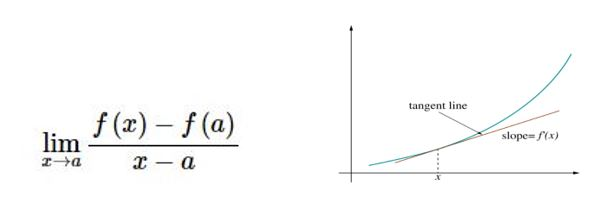

Research Question/Hypothesis:

Can we track the price of cryptocurrency over time with sequential data? Can machine learning models and neural networks take this sequential data and predict a future cryptocurrency trend? Can mathematical derivatives help us make better stock predictions? At what time scales/intervals can we start applying these calculus methods to predict stock trends? The calculus method we will be applying will be the first derivative.

The topic of the project is to find out whether mathematical derivatives help us in determining whether a cryptocurrency stock will rise or fall in the future. Since the graphs of stocks seem to be erratic, we will need to smooth out the graph as much as possible in order to apply the derivative method.  After we have smooth out the graph and data, we will be able to find the derivative and any given point because our data will be continuous and differentiable everywhere.

We will be using machine learning tools as well as a neural network to reinforce my project idea. My project will be a classification project because I will be predicting whether the price will go up or down and not actually try to predict a price. 

The following is a part is very important in our analysis of the project; if a derivative is positive then the slope or graph (of the cryptocurrency) is increasing over that interval we are calculating. If the derivative is negative, then the slope or graph is decreasing and therefore the price of the cryptocurrency is decreasing over that interval. If the derivative is zero, then the graph is neither going up or down. The higher the value of the derivative, the higher the slope and the faster it is increasing. The lower (or negative) the value of the derivative, the steeper the graph is and the faster it is decreasing. Below is a graph showing an upward and downward trendline.

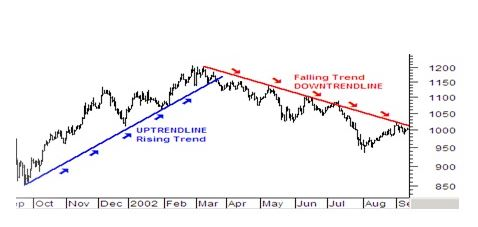

Implementation Strategy:

The data we will use for the project contains the open and closing prices for the cryptocurrencies. The instances will be for all of 2021 up until the beginning of September. I will be working with four cryptocurrencies: Bitcoin, XRP, Litecoin, and Ethereum. How will the derivatives be calculated? Well, the derivative, i.e., the slope, is the rise over run or change in Y over change in X. Our X will be the different time scales/intervals, and the change in Y will be the difference between the open and close prices during that interval. The intervals will be determined during our exploration as we will need to find out which time series the method works best for.

After our first derivatives are calculated then we will create our target, where a positive slope will be represented by a 1 and a negative or zero slope will be represented by a 0. After further analysis and creating our models, I will want to predict the trend of the cryptocurrencies in that interval (increasing/decreasing). We will use the historical data to help us with the predictions and to find that answer.

I will be comparing the cryptocurrency prices, graphs, models, and predictions. We will be exploring several derivatives, i.e., time intervals. For example, we will look at derivative calculations minute by minute, every 12 hours, and weekly intervals. This will help us get a clearer picture of how our models work. 

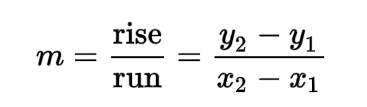

Common Imports

In [1]:
#Importing Libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#Importing Models I will use

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras

#Importing to smooth data

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

#Importing GridSearch for Cross Validation

from sklearn.model_selection import GridSearchCV

#Creating the Performance Measures as definitions (not using Scikit-Learn)

#Accuracy

def accuracy_score(true_labels, mod_predictions):
    sum = 0
    for i in range(len(true_labels)):
        if true_labels[i] == mod_predictions[i]:
            sum = sum + 1
    return(sum/len(true_labels))

#Precision and Recall, using sklearn

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Creating folder for images

PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
#For plotting the minute datasets

def plot_minute_data(data_df1, data_df2, data_df3, data_df4):

    fig = plt.figure(figsize=(25,25))

    ax1 = fig.add_subplot(2,2,1) #creating the axis for each subplot
    ax2 = fig.add_subplot(2,2,2)
    ax3 = fig.add_subplot(2,2,3)
    ax4 = fig.add_subplot(2,2,4)

    x1 = data_df1["date"]
    y1 = data_df1["close"]
    x2 = data_df2["date"]
    y2 = data_df2["close"]
    x3 = data_df3["date"]
    y3 = data_df3["close"]
    x4 = data_df4["date"]
    y4 = data_df4["close"]

    ax1.set(xlabel = "Time", ylabel = "Stock Price", title="Bitcoin") #labeling the axis for each subplot
    ax2.set(xlabel = "Time", ylabel = "Stock Price", title="Ethereum")
    ax3.set(xlabel = "Time", ylabel = "Stock Price", title="Litecoin")
    ax4.set(xlabel = "Time", ylabel = "Stock Price", title="XRP")

    ax1.plot(x1, y1) #plotting the data in the x,y,z plane via .scatter
    ax2.plot(x2, y2)
    ax3.plot(x3, y3)
    ax4.plot(x4, y4)

plt.show()


#For plotting the hourly datasets

def plot_hourly_data(data_df1, data_df2, data_df3, data_df4):

    fig = plt.figure(figsize=(25,25))

    ax1 = fig.add_subplot(2,2,1) #creating the axis for each subplot
    ax2 = fig.add_subplot(2,2,2)
    ax3 = fig.add_subplot(2,2,3)
    ax4 = fig.add_subplot(2,2,4)

    x1 = data_df1["date"]
    y1 = data_df1["close"]
    x2 = data_df2["date"]
    y2 = data_df2["close"]
    x3 = data_df3["date"]
    y3 = data_df3["close"]
    x4 = data_df4["date"]
    y4 = data_df4["close"]

    ax1.set(xlabel = "Time", ylabel = "Stock Price", title="Bitcoin") #labeling the axis for each subplot
    ax2.set(xlabel = "Time", ylabel = "Stock Price", title="Ethereum")
    ax3.set(xlabel = "Time", ylabel = "Stock Price", title="Litecoin")
    ax4.set(xlabel = "Time", ylabel = "Stock Price", title="XRP")

    ax1.plot(x1, y1) #plotting the data in the x,y,z plane via .scatter
    ax2.plot(x2, y2)
    ax3.plot(x3, y3)
    ax4.plot(x4, y4)

    plt.show()


#For plotting the daily datasets

def plot_daily_data(data_df1, data_df2, data_df3, data_df4):

    fig = plt.figure(figsize=(25,25))

    ax1 = fig.add_subplot(2,2,1) #creating the axis for each subplot
    ax2 = fig.add_subplot(2,2,2)
    ax3 = fig.add_subplot(2,2,3)
    ax4 = fig.add_subplot(2,2,4)

    x1 = data_df1["date"]
    y1 = data_df1["close"]
    x2 = data_df2["date"]
    y2 = data_df2["close"]
    x3 = data_df3["date"]
    y3 = data_df3["close"]
    x4 = data_df4["date"]
    y4 = data_df4["close"]

    ax1.set(xlabel = "Time", ylabel = "Stock Price", title="Bitcoin") #labeling the axis for each subplot
    ax2.set(xlabel = "Time", ylabel = "Stock Price", title="Ethereum")
    ax3.set(xlabel = "Time", ylabel = "Stock Price", title="Litecoin")
    ax4.set(xlabel = "Time", ylabel = "Stock Price", title="XRP")

    ax1.plot(x1, y1) #plotting the data in the x,y,z plane via .scatter
    ax2.plot(x2, y2)
    ax3.plot(x3, y3)
    ax4.plot(x4, y4)

    plt.show()
    

#Plotting Minute data with convolution

def plot_minute_data_smoothed(data_df1, data_df2, data_df3, data_df4, data_df5, data_df6, data_df7, data_df8):

    fig = plt.figure(figsize=(25,25))

    ax1 = fig.add_subplot(2,2,1) #creating the axis for each subplot
    ax2 = fig.add_subplot(2,2,2)
    ax3 = fig.add_subplot(2,2,3)
    ax4 = fig.add_subplot(2,2,4)

    x1 = data_df1["date"]
    y1 = data_df1["close"]
    x2 = data_df2["date"]
    y2 = data_df2["close"]
    x3 = data_df3["date"]
    y3 = data_df3["close"]
    x4 = data_df4["date"]
    y4 = data_df4["close"]

    ax1.set(xlabel = "Time", ylabel = "Stock Price", title="Bitcoin") #labeling the axis for each subplot
    ax2.set(xlabel = "Time", ylabel = "Stock Price", title="Ethereum")
    ax3.set(xlabel = "Time", ylabel = "Stock Price", title="Litecoin")
    ax4.set(xlabel = "Time", ylabel = "Stock Price", title="XRP")

    ax1.plot(x1, y1)
    ax1.plot(x1, data_df5, color = "orange")
    ax2.plot(x2, y2)
    ax2.plot(x2, data_df6, color = "orange")
    ax3.plot(x3, y3)
    ax3.plot(x3, data_df7, color = "orange")
    ax4.plot(x4, y4)
    ax4.plot(x4, data_df8, color = "orange")

    plt.show()
    
#Plotting Hourly Data with Convolution

def plot_hourly_data_smoothed(data_df1, data_df2, data_df3, data_df4, data_df5, data_df6, data_df7, data_df8):
    
    fig = plt.figure(figsize=(25,25))

    ax1 = fig.add_subplot(2,2,1) #creating the axis for each subplot
    ax2 = fig.add_subplot(2,2,2)
    ax3 = fig.add_subplot(2,2,3)
    ax4 = fig.add_subplot(2,2,4)

    x1 = data_df1["date"]
    y1 = data_df1["close"]
    x2 = data_df2["date"]
    y2 = data_df2["close"]
    x3 = data_df3["date"]
    y3 = data_df3["close"]
    x4 = data_df4["date"]
    y4 = data_df4["close"]
    
    ax1.set(xlabel = "Time", ylabel = "Stock Price", title="Bitcoin") #labeling the axis for each subplot
    ax2.set(xlabel = "Time", ylabel = "Stock Price", title="Ethereum")
    ax3.set(xlabel = "Time", ylabel = "Stock Price", title="Litecoin")
    ax4.set(xlabel = "Time", ylabel = "Stock Price", title="XRP")

    ax1.plot(x1, y1)#plotting the data
    ax1.plot(x1, data_df5, color = "orange")
    ax2.plot(x2, y2)
    ax2.plot(x2, data_df6, color = "orange")
    ax3.plot(x3, y3)
    ax3.plot(x3, data_df7, color = "orange")
    ax4.plot(x4, y4)
    ax4.plot(x4, data_df8, color = "orange")

    plt.show()
    
#Plotting Daily data with Convolution

def plot_daily_data_smoothed(data_df1, data_df2, data_df3, data_df4, data_df5, data_df6, data_df7, data_df8):

    fig = plt.figure(figsize=(25,25))

    ax1 = fig.add_subplot(2,2,1) #creating the axis for each subplot
    ax2 = fig.add_subplot(2,2,2)
    ax3 = fig.add_subplot(2,2,3)
    ax4 = fig.add_subplot(2,2,4)

    x1 = data_df1["date"]
    y1 = data_df1["close"]
    x2 = data_df2["date"]
    y2 = data_df2["close"]
    x3 = data_df3["date"]
    y3 = data_df3["close"]
    x4 = data_df4["date"]
    y4 = data_df4["close"]
    
    ax1.set(xlabel = "Time", ylabel = "Stock Price", title="Bitcoin") #labeling the axis for each subplot
    ax2.set(xlabel = "Time", ylabel = "Stock Price", title="Ethereum")
    ax3.set(xlabel = "Time", ylabel = "Stock Price", title="Litecoin")
    ax4.set(xlabel = "Time", ylabel = "Stock Price", title="XRP")

    ax1.plot(x1, y1)#plotting the data
    ax1.plot(x1, data_df5, color = "orange")
    ax2.plot(x2, y2)
    ax2.plot(x2, data_df6, color = "orange")
    ax3.plot(x3, y3)
    ax3.plot(x3, data_df7, color = "orange")
    ax4.plot(x4, y4)
    ax4.plot(x4, data_df8, color = "orange")

    plt.show()
    
#Plotting Exponential Data

def plot_daily_data_exponential(data_df1, data_df2, data_df3, data_df4, data_df5, data_df6):

    fig = plt.figure(figsize=(25,25))

    ax1 = fig.add_subplot(2,2,1) #creating the axis for each subplot
    ax2 = fig.add_subplot(2,2,2)
    ax3 = fig.add_subplot(2,2,3)

    x1 = data_df1["date"]
    y1 = data_df1["close"]
    x2 = data_df2["date"]
    y2 = data_df2["close"]
    x3 = data_df3["date"]
    y3 = data_df3["close"]
    
    ax1.set(xlabel = "Time", ylabel = "Stock Price", title="Minute") #labeling the axis for each subplot
    ax2.set(xlabel = "Time", ylabel = "Stock Price", title="Hourly")
    ax3.set(xlabel = "Time", ylabel = "Stock Price", title="Daily")

    ax1.plot(x1, y1)#plotting the data
    ax1.plot(x1, data_df4, color = "orange")
    ax2.plot(x2, y2)
    ax2.plot(x2, data_df5, color = "orange")
    ax3.plot(x3, y3)
    ax3.plot(x3, data_df6, color = "orange")

    plt.show()

### Importing Datasets

The website link is - https://www.cryptodatadownload.com/data/bitstamp/

In [3]:
#Importing Minute by Minute Data

path = r"C:\Users\mnava\OneDrive\Final Project - Crypto\Data sets\Minute by Minute"
os.chdir(path)

btc_minute = pd.read_csv("Bitstamp_BTCUSD_2021_minute.csv")
eth_minute = pd.read_csv("Bitstamp_ETHUSD_2021_minute.csv")
ltc_minute = pd.read_csv("Bitstamp_LTCUSD_2021_minute.csv")
xrp_minute = pd.read_csv("Bitstamp_XRPUSD_2021_minute.csv")

#Importing Hourly Data

path = r"C:\Users\mnava\OneDrive\Final Project - Crypto\Data sets\Hourly"
os.chdir(path)

btc_hourly = pd.read_csv("Bitstamp_BTCUSD_1h.csv")
eth_hourly = pd.read_csv("Bitstamp_ETHUSD_1h.csv")
ltc_hourly = pd.read_csv("Bitstamp_LTCUSD_1h.csv")
xrp_hourly = pd.read_csv("Bitstamp_XRPUSD_1h.csv")

#Importing Daily Data

path = r"C:\Users\mnava\OneDrive\Final Project - Crypto\Data sets\Daily"
os.chdir(path)

btc_daily = pd.read_csv("Bitstamp_BTCUSD_daily.csv")
eth_daily = pd.read_csv("Bitstamp_ETHUSD_daily.csv")
ltc_daily = pd.read_csv("Bitstamp_LTCUSD_daily.csv")
xrp_daily = pd.read_csv("Bitstamp_XRPUSD_daily.csv")

Converting Date Column Type - 

The Pandas feature pd.to_datetime converts the string Date time to a Python Date Time. This will help us plot the graphs in matplotlib and for model creation. You can see below that the date column is showing up as an object. We will convert it to a date data type below.

In [4]:
btc_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29179 entries, 0 to 29178
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        29179 non-null  int64  
 1   date        29179 non-null  object 
 2   symbol      29179 non-null  object 
 3   open        29179 non-null  float64
 4   high        29179 non-null  float64
 5   low         29179 non-null  float64
 6   close       29179 non-null  float64
 7   Volume BTC  29179 non-null  float64
 8   Volume USD  29179 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 2.0+ MB


In [5]:
btc_minute.date = pd.to_datetime(btc_minute.date)
eth_minute.date = pd.to_datetime(eth_minute.date)
ltc_minute.date = pd.to_datetime(ltc_minute.date)
xrp_minute.date = pd.to_datetime(xrp_minute.date)

btc_hourly.date = pd.to_datetime(btc_hourly.date)
eth_hourly.date = pd.to_datetime(eth_hourly.date)
ltc_hourly.date = pd.to_datetime(ltc_hourly.date)
xrp_hourly.date = pd.to_datetime(xrp_hourly.date)

btc_daily.date = pd.to_datetime(btc_daily.date)
eth_daily.date = pd.to_datetime(eth_daily.date)
ltc_daily.date = pd.to_datetime(ltc_daily.date)
xrp_daily.date = pd.to_datetime(xrp_daily.date)

### Exploring Data

Exploring Bitcoin Data Only. We are only exploring the Bitcoin data but you can apply the same features to the other data sets. Such as the .head, .tail, .describe, etc.

In [6]:
btc_minute.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1631344800,2021-09-11 07:20:00,BTC/USD,45033.76,45033.76,45033.76,45033.76,0.000518,23.339647
1,1631344740,2021-09-11 07:19:00,BTC/USD,45037.46,45066.58,45037.46,45055.38,0.244882,11033.257870
2,1631344680,2021-09-11 07:18:00,BTC/USD,45084.63,45103.25,45084.63,45103.25,0.031200,1407.221400
3,1631344620,2021-09-11 07:17:00,BTC/USD,45026.05,45065.42,44970.85,45065.42,0.612686,27610.952370
4,1631344560,2021-09-11 07:16:00,BTC/USD,45137.64,45137.64,45025.00,45025.00,0.479006,21567.246950


In [7]:
btc_minute.tail()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
364755,1609459500,2021-01-01 00:05:00,BTC/USD,29021.86,29023.38,28982.33,28999.50,1.062360,30807.89925
364756,1609459440,2021-01-01 00:04:00,BTC/USD,29048.13,29057.73,29035.61,29045.19,1.446538,42014.95943
364757,1609459380,2021-01-01 00:03:00,BTC/USD,29037.68,29069.39,29019.00,29048.13,2.189621,63604.38239
364758,1609459320,2021-01-01 00:02:00,BTC/USD,29069.80,29073.02,29028.14,29035.89,3.030301,87987.49928
364759,1609459260,2021-01-01 00:01:00,BTC/USD,29007.31,29086.90,29007.31,29083.47,14.561951,423512.06040


In [8]:
btc_minute.shape

(364760, 9)

In [9]:
btc_hourly.shape

(29179, 9)

In [10]:
btc_daily.shape

(2478, 9)

Here we are able to see that the date column has been converted to a datetime data type.

In [11]:
btc_minute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364760 entries, 0 to 364759
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   unix        364760 non-null  int64         
 1   date        364760 non-null  datetime64[ns]
 2   symbol      364760 non-null  object        
 3   open        364760 non-null  float64       
 4   high        364760 non-null  float64       
 5   low         364760 non-null  float64       
 6   close       364760 non-null  float64       
 7   Volume BTC  364760 non-null  float64       
 8   Volume USD  364760 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 25.0+ MB


In [12]:
btc_minute.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,3.647600e+05,364760.000000,364760.000000,364760.000000,364760.000000,364760.000000,3.647600e+05
mean,1.620402e+09,44506.778452,44538.199827,44474.926309,44507.159283,4.210631,1.788119e+05
std,6.317837e+06,9449.003239,9450.647062,9447.439548,9449.240033,9.375041,3.807100e+05
min,1.609459e+09,28093.810000,28397.520000,27734.000000,28073.030000,0.000000,0.000000e+00
25%,1.614931e+09,35650.487500,35678.080000,35621.717500,35650.000000,0.458982,1.990329e+04
50%,1.620402e+09,45143.640000,45175.930000,45108.130000,45143.735000,1.516693,6.659906e+04
75%,1.625873e+09,52857.160000,52900.507500,52810.175000,52857.380000,4.144909,1.815749e+05
max,1.631345e+09,64842.860000,64895.220000,64731.250000,64859.300000,398.565948,1.396792e+07


### Visualizing Data with Graphs

Minute by Minute data - 

Here we are exploring all of the raw data. The minute data starts from January 1st, 2021. Please note the noisy data and peaks that happened around the same time, the month of May.


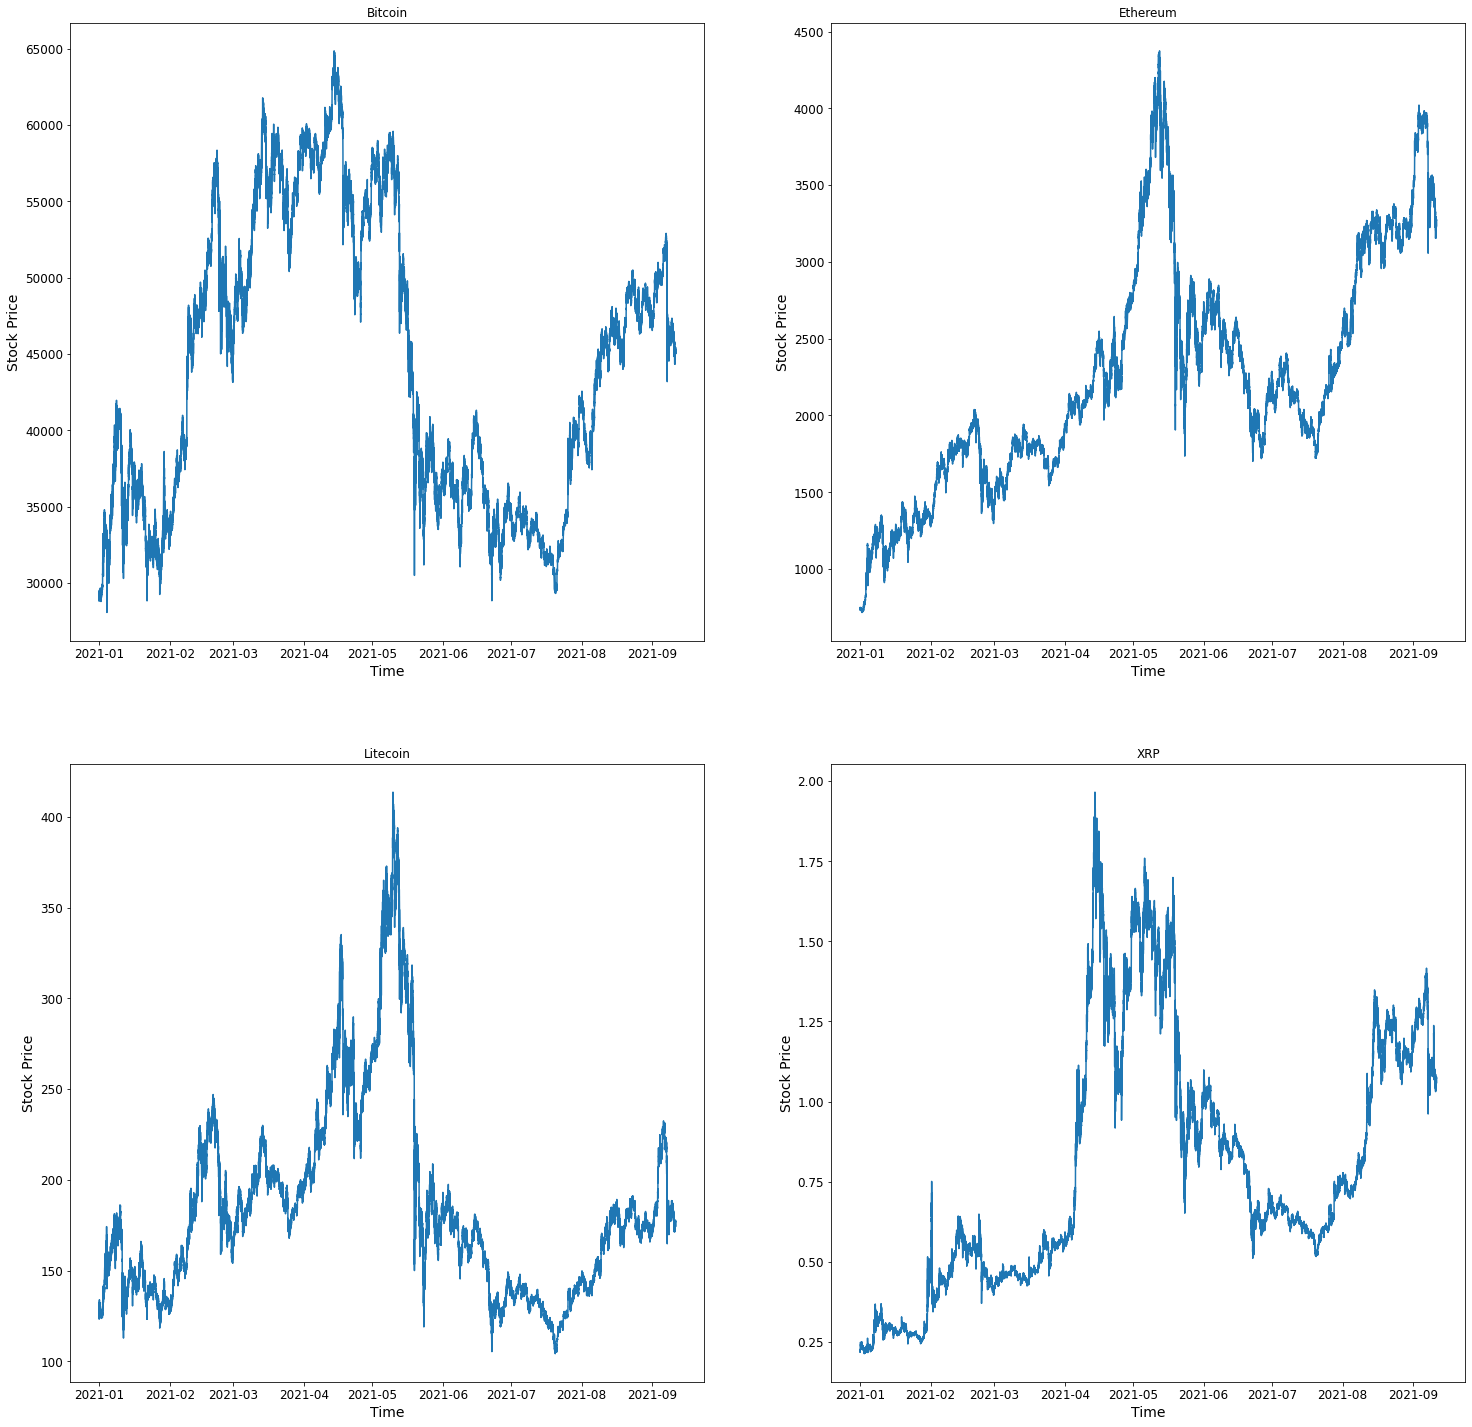

In [13]:
plot_minute_data(btc_minute, eth_minute, ltc_minute, xrp_minute)

Hourly Data - 

Here we can see that the there is not as much noise as the previous minute data, but still a substantial amount. This will help us in our analysis since there are less points.


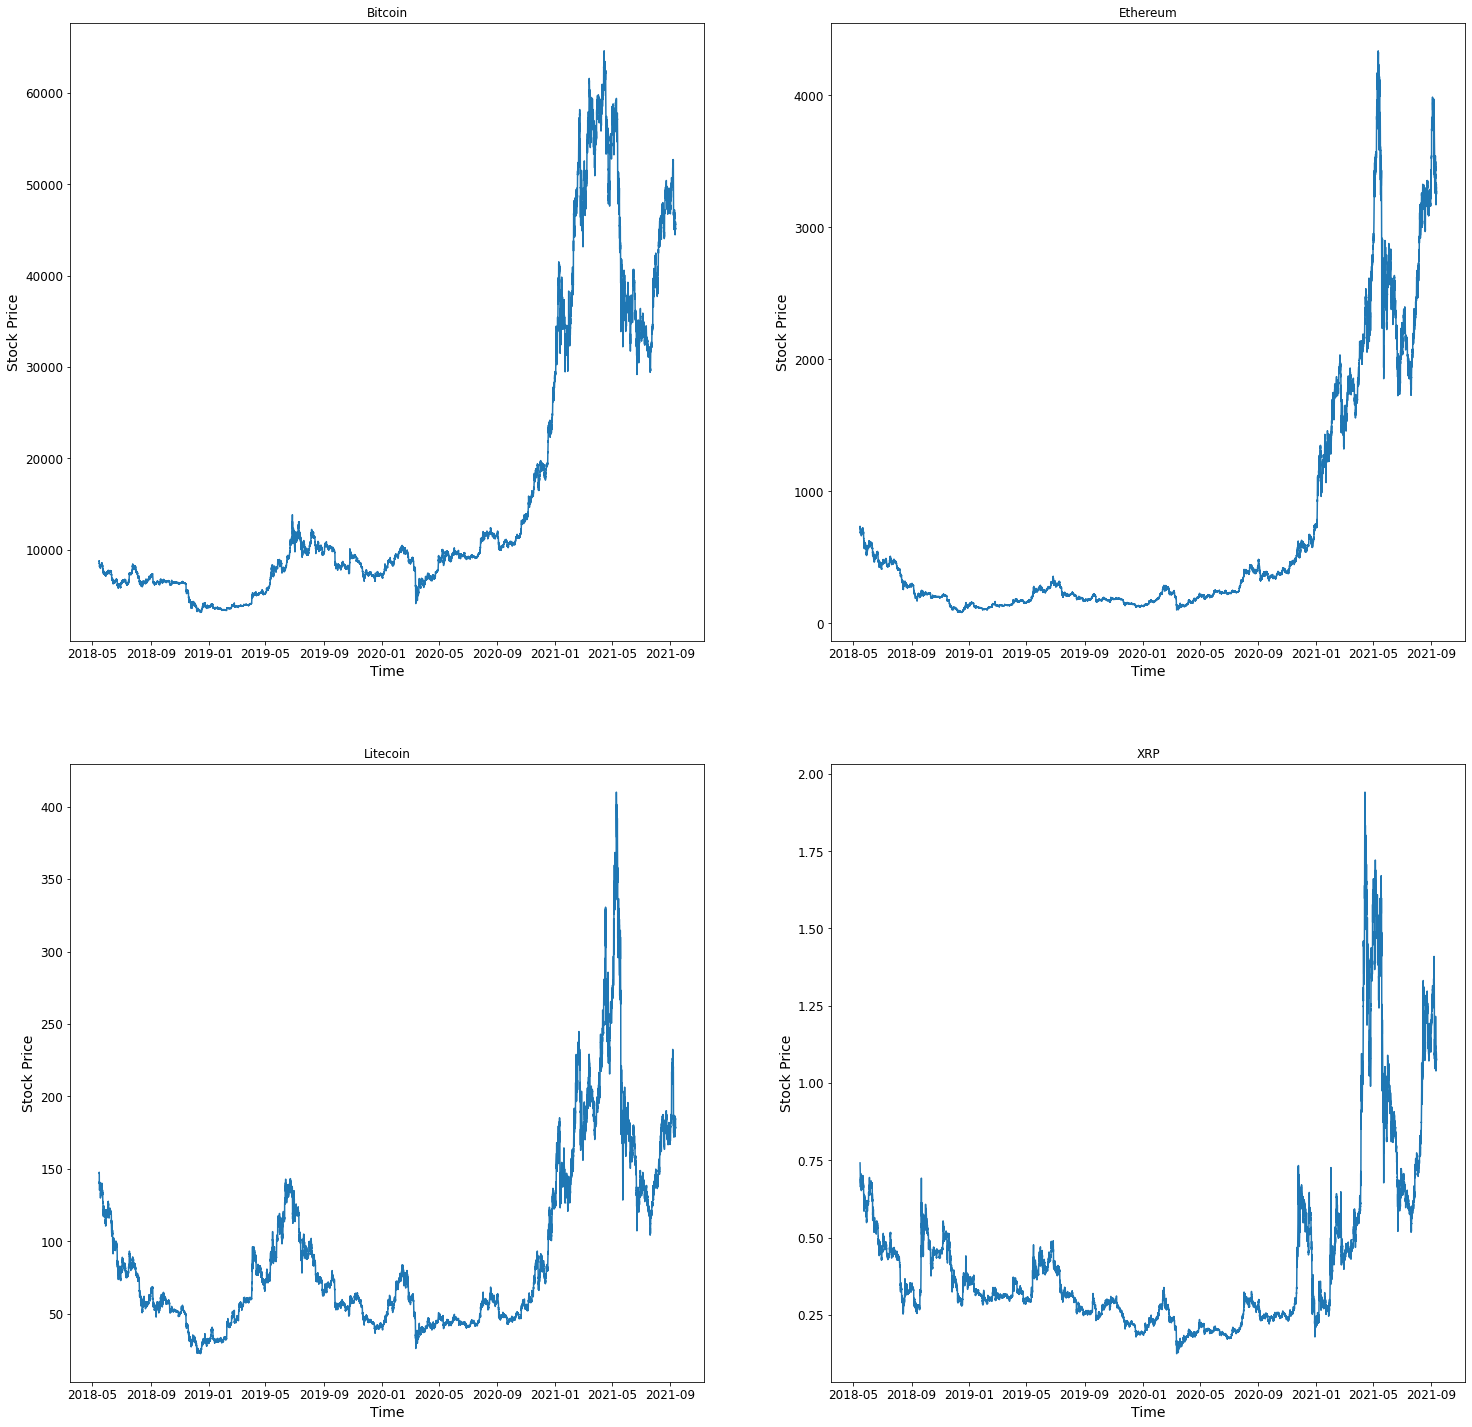

In [14]:
plot_hourly_data(btc_hourly, eth_hourly, ltc_hourly, xrp_hourly)

Daily Data - 

With this data we can clearly see that the much of the noise has been removed. Less data points and the curves are noticeable. There is data missing from mid to early 2017 for XRP, Etherum, and Litecoin. We will not be including any of those instances in our models.


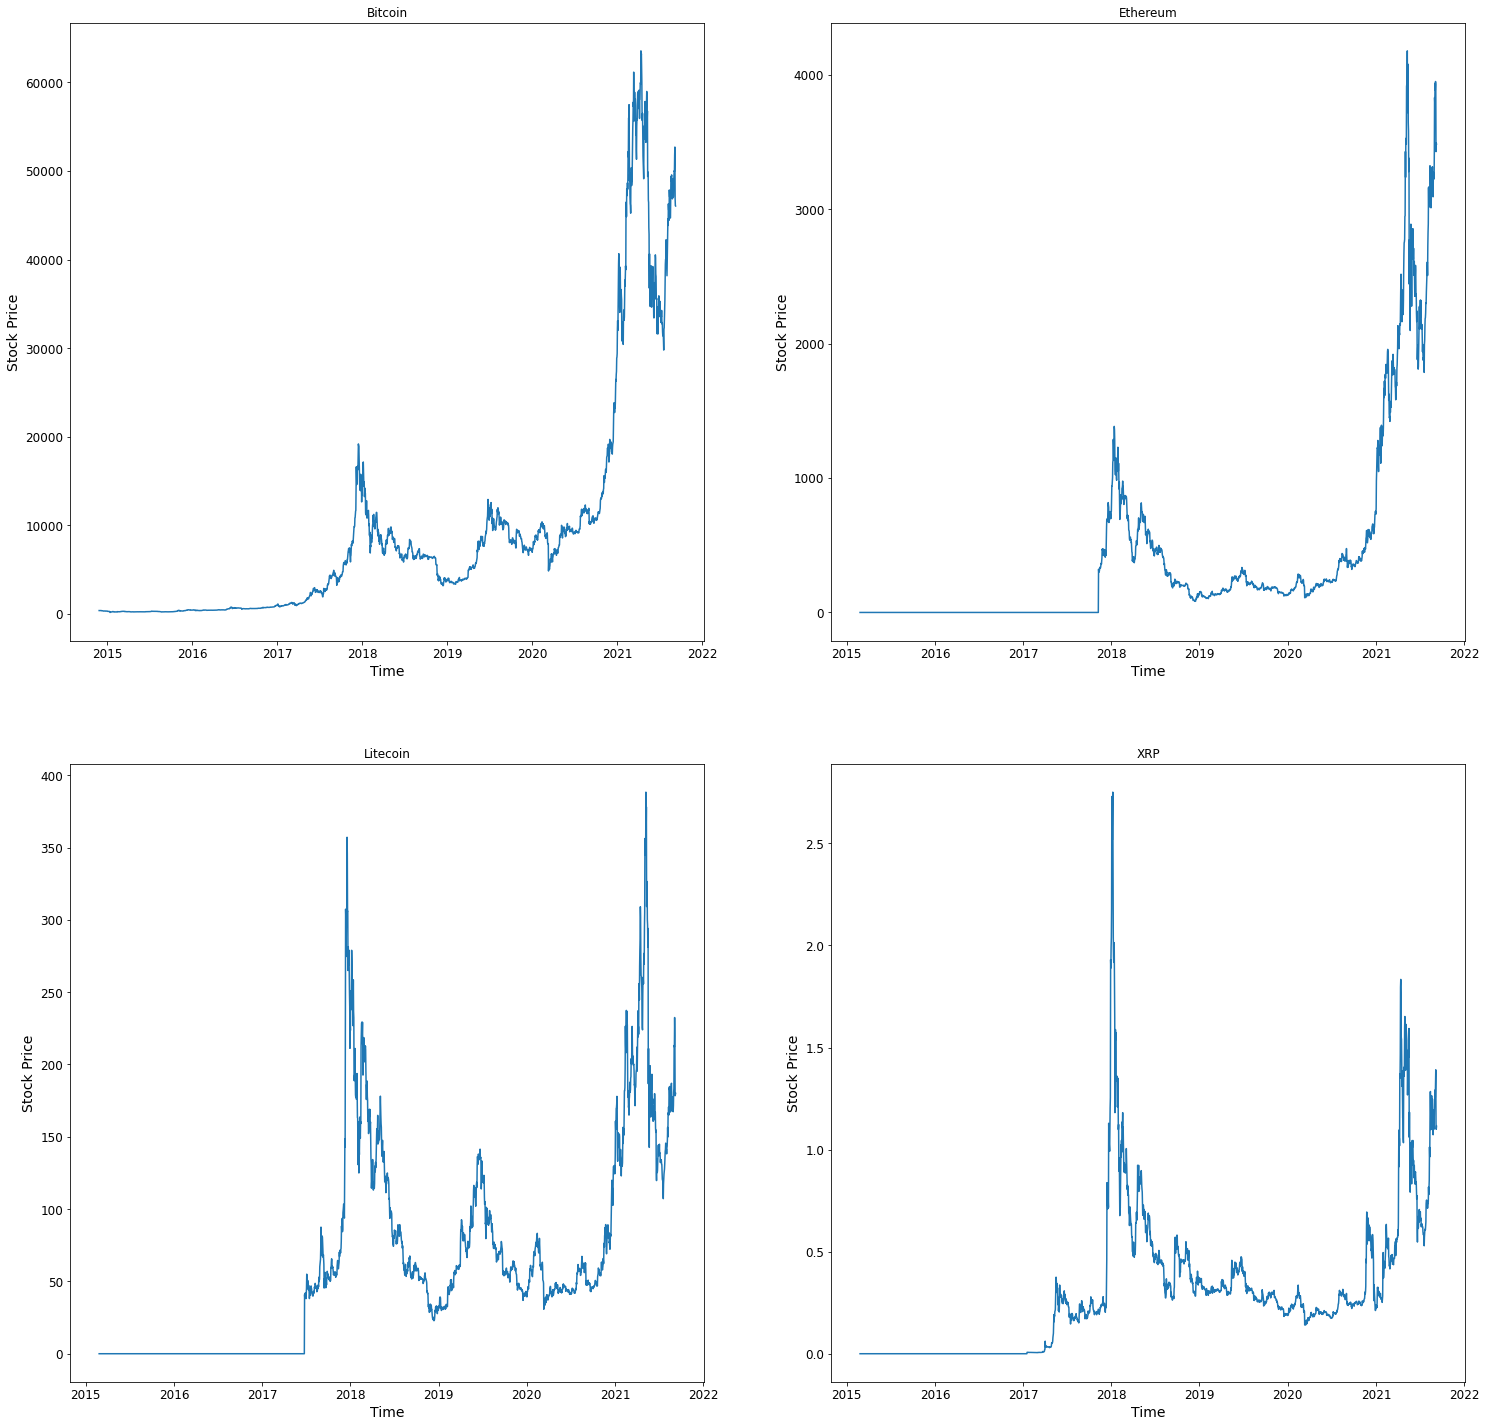

In [15]:
plot_daily_data(btc_daily, eth_daily, ltc_daily, xrp_daily)

### Visualizing graphs with Intervals (i.e. window)

Minute Data with Intervals of 30 minutes -

This data is not as dense as the previous sets since we have shortened the number of instances. However, there is still a lot of noise on this dataset.


Here we are creating the intervals for training. The btc_minute data is at 30-minute interval, so we are shortening the data as if the data we are collecting is every half hour. The btc_hourly data is shortened to reflect every 12 hours or half a day. The btc_daily data is divided for every 7th day, so we converted this to weekly data.

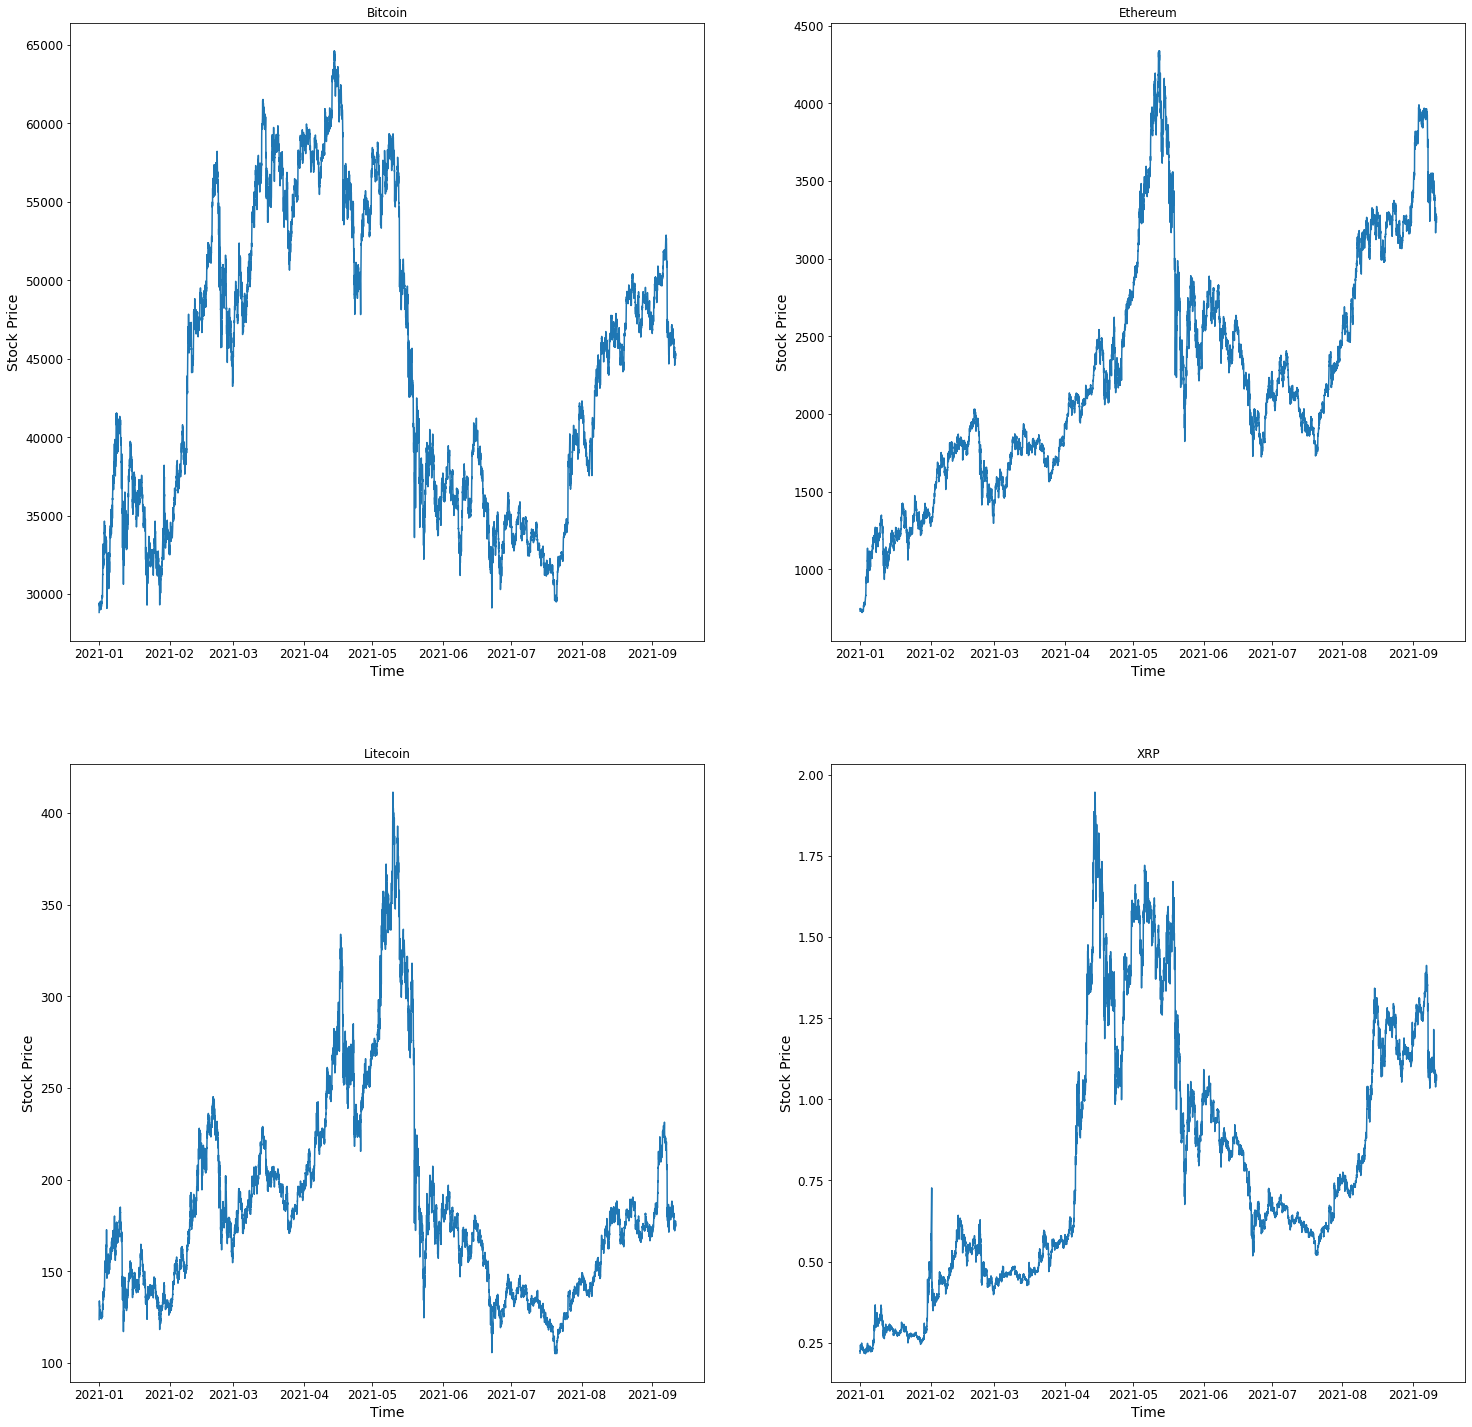

In [16]:
plot_minute_data(btc_minute[::30], eth_minute[::30], ltc_minute[::30], xrp_minute[::30])

Hourly Data with (12 hours) Half Day Intervals -

This shortened set looks a lot cleaner and less concentrated. A lot of the noise is being lost but also, we are losing data.

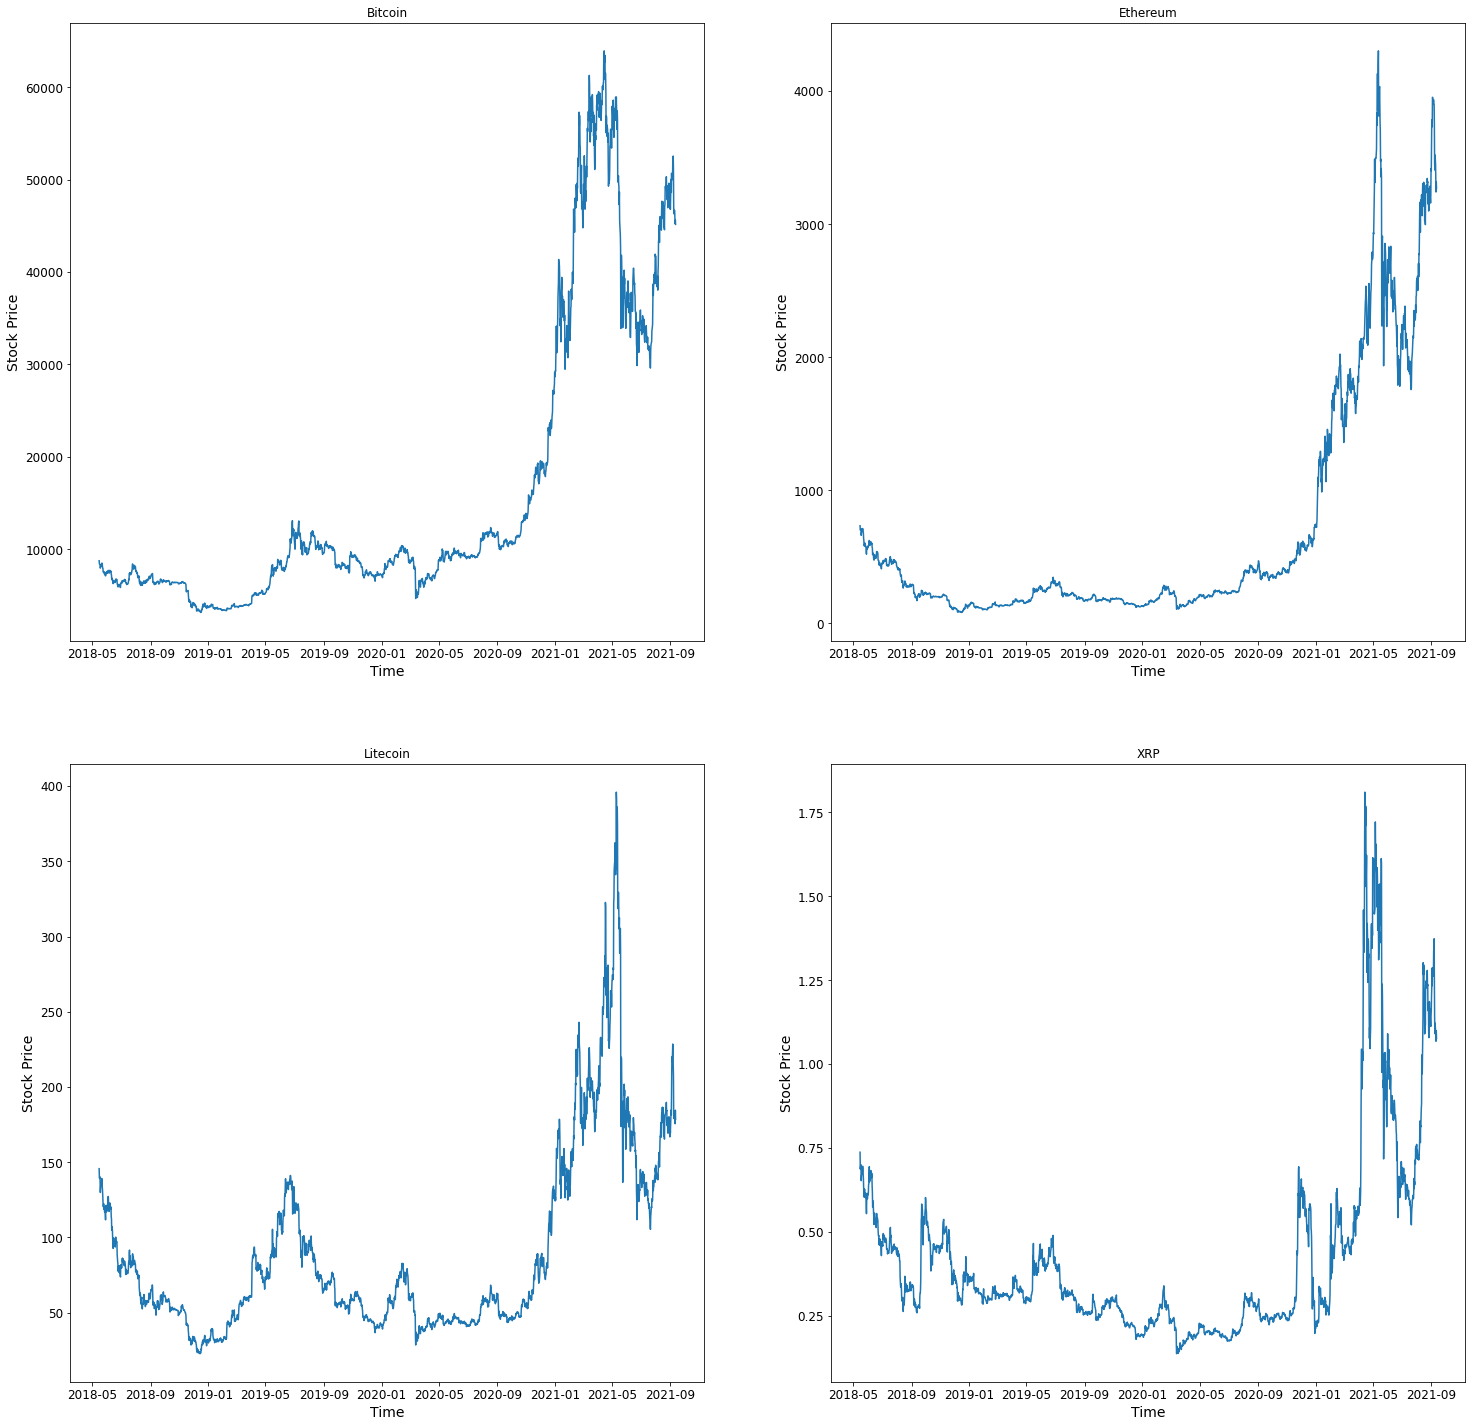

In [17]:
plot_hourly_data(btc_hourly[::12], eth_hourly[::12], ltc_hourly[::12], xrp_hourly[::12])

Daily Data with (7 day) Weekly Intervals - 

This is the cleanest, least dense, least noisy out of all the prior sets. This set will help us a lot in our exploration for the best model. Much of the noise has been removed.


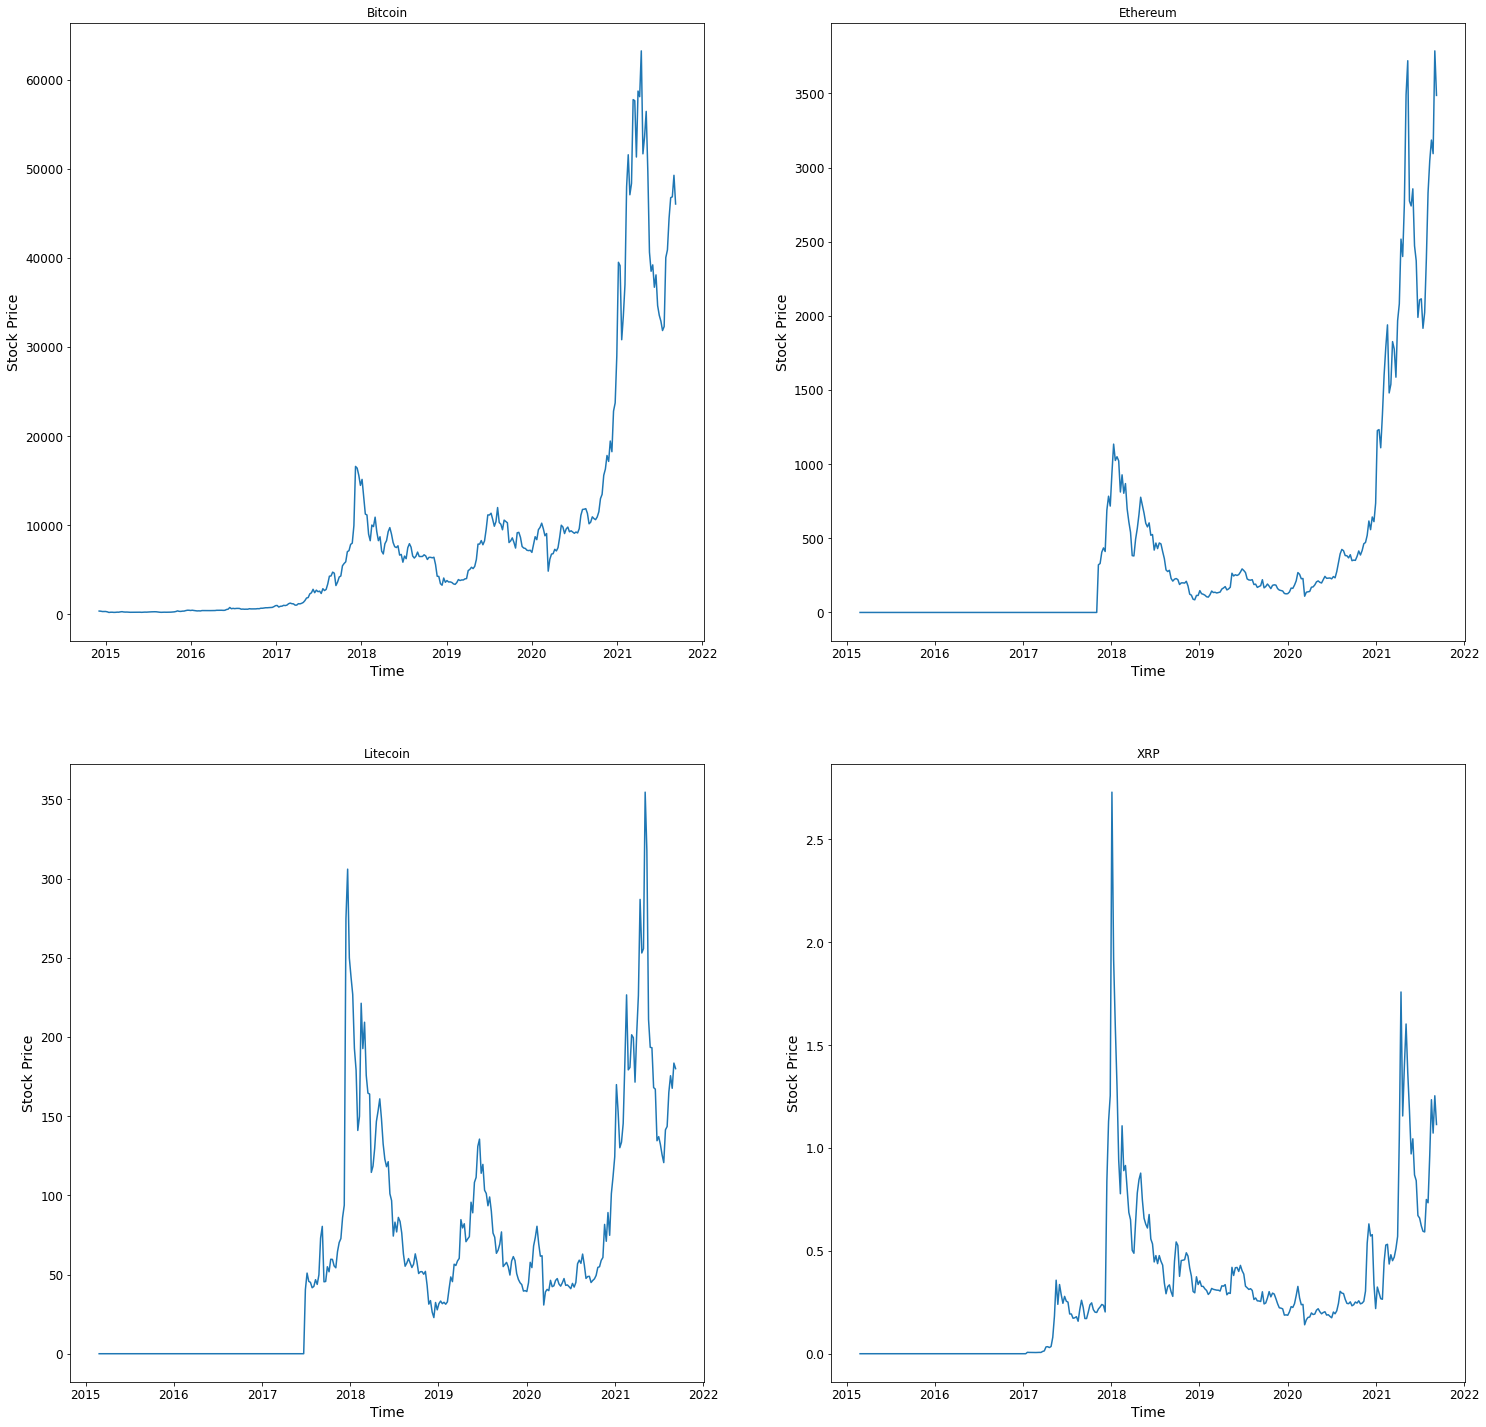

In [18]:
plot_daily_data(btc_daily[::7], eth_daily[::7], ltc_daily[::7], xrp_daily[::7])

### What is Data Smoothing?

Data smoothing is when data is collected and manipulated in a way that reduces volatility and noise from an original dataset. The idea of data smoothing is to identify changes in data that can help predict patterns and trends. It is an extremely useful tool for statisticians and traders who tend to look at a lot of data or continuous data, it helps find patterns that we might otherwise not see. 

Data smoothing can help predict trends, in economic analysis, stock market or on other practices. Smoothing also intends to ignore one time outliers and takes into effect seasonality. Since much of the noise is removed from the dataset then other patterns clearly stand out.

Downfall - 

Data smoothing doesn't always provide explanations for the patters or trends it can identify. Furthermore, we lose data. When smoothing data, we can end up ignoring certain peaks or points in a graph that would have otherwise been very useful in our analysis.

### Smoothing Data - With Convolution

There are two types of convolutions, there is a medium and an average. A moving average are calculations used to view data points by selecting a series of averages of subsets from the complete dataset. So here, we are using the close columns from the dataset and taking their averages based on the filter length. The parameter mode "same" means that we want the endpoints or the intervals to be the same. 

We are simply creating a constant updated average price and this smoothens the data. This method takes the moving average for example for the next 30 minutes or 12 hours or 7 days.

Moving averages are used to identify the direction of a stock or price. The moving average is essentially a trend identifier and can be helpful when using historical data in a stock.

The link I used to find out the code below to smooth the data. It is a YouTube link.
https://www.youtube.com/watch?v=7k5rKTSEDKA&list=LL&index=6&t=478s


The convolution operator with an explanation of the parameters you can use is in the numpy.org page. Here is a link for it: https://numpy.org/doc/stable/reference/generated/numpy.convolve.html

The filter length is the number of days we want to start averaging them out by, (i.e., a subset of the dataset).



In [19]:
filter_length = 10000

btc_minute_close_moving_average = np.convolve(btc_minute["close"], np.ones((filter_length)), mode="same")
btc_minute_close_moving_average /= filter_length

eth_minute_close_moving_average = np.convolve(eth_minute["close"], np.ones((filter_length)), mode="same")
eth_minute_close_moving_average /= filter_length


ltc_minute_close_moving_average = np.convolve(ltc_minute["close"], np.ones((filter_length)), mode="same")
ltc_minute_close_moving_average /= filter_length


xrp_minute_close_moving_average = np.convolve(xrp_minute["close"], np.ones((filter_length)), mode="same")
xrp_minute_close_moving_average /= filter_length

In [20]:
filter_length = 1000

btc_hourly_close_moving_average = np.convolve(btc_hourly["close"], np.ones((filter_length)), mode="same")
btc_hourly_close_moving_average /= filter_length

eth_hourly_close_moving_average = np.convolve(eth_hourly["close"], np.ones((filter_length)), mode="same")
eth_hourly_close_moving_average /= filter_length

ltc_hourly_close_moving_average = np.convolve(ltc_hourly["close"], np.ones((filter_length)), mode="same")
ltc_hourly_close_moving_average /= filter_length

xrp_hourly_close_moving_average = np.convolve(xrp_hourly["close"], np.ones((filter_length)), mode="same")
xrp_hourly_close_moving_average /= filter_length

In [21]:
filter_length = 75

btc_daily_close_moving_average = np.convolve(btc_daily["close"], np.ones((filter_length)), mode="same")
btc_daily_close_moving_average /= filter_length

eth_daily_close_moving_average = np.convolve(eth_daily["close"], np.ones((filter_length)), mode="same")
eth_daily_close_moving_average /= filter_length

ltc_daily_close_moving_average = np.convolve(ltc_daily["close"], np.ones((filter_length)), mode="same")
ltc_daily_close_moving_average /= filter_length

xrp_daily_close_moving_average = np.convolve(xrp_daily["close"], np.ones((filter_length)), mode="same")
xrp_daily_close_moving_average /= filter_length

Plotting Minute data with 30 Minute intervals and plotting the convolution data -

Please note that the yellow line is the convoluted data and the blue line is the actual data points. Notice that the smoothed-out data has the noise removed and has less data points. The curves on the graph are better and we will be able to take derivatives in this function.

We lost a lot of data extremities but the overall trend is there.

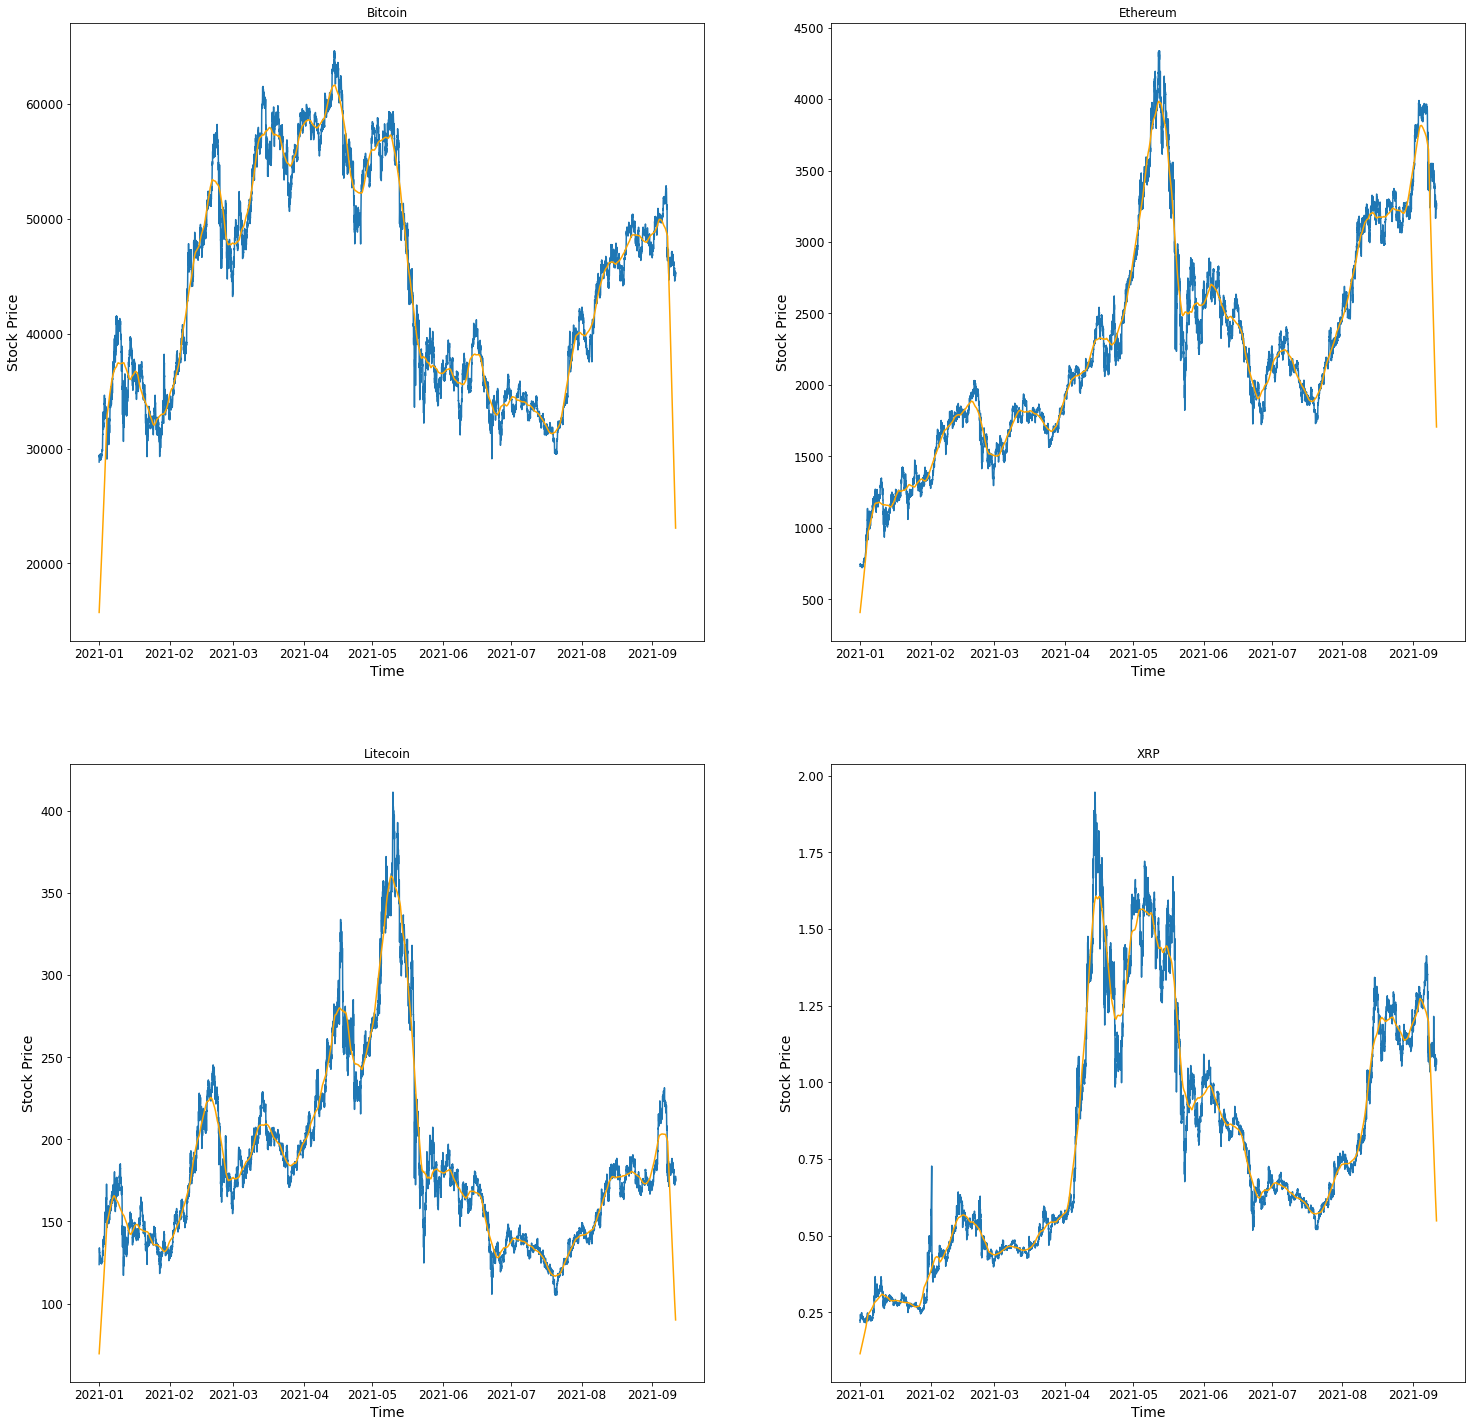

In [22]:
plot_minute_data_smoothed(btc_minute[::30], eth_minute[::30], ltc_minute[::30], xrp_minute[::30],
                            btc_minute_close_moving_average[::30], eth_minute_close_moving_average[::30],
                            ltc_minute_close_moving_average[::30], xrp_minute_close_moving_average[::30])

Plotting Hourly data with 12 Hour intervals and plotting the convolution data - 

This smoothed out subset is what we want to be looking at. Notice that the smoothed-out data has the noise removed and has less data points. The curves on the graph are better and we will be able to take derivatives in this function.

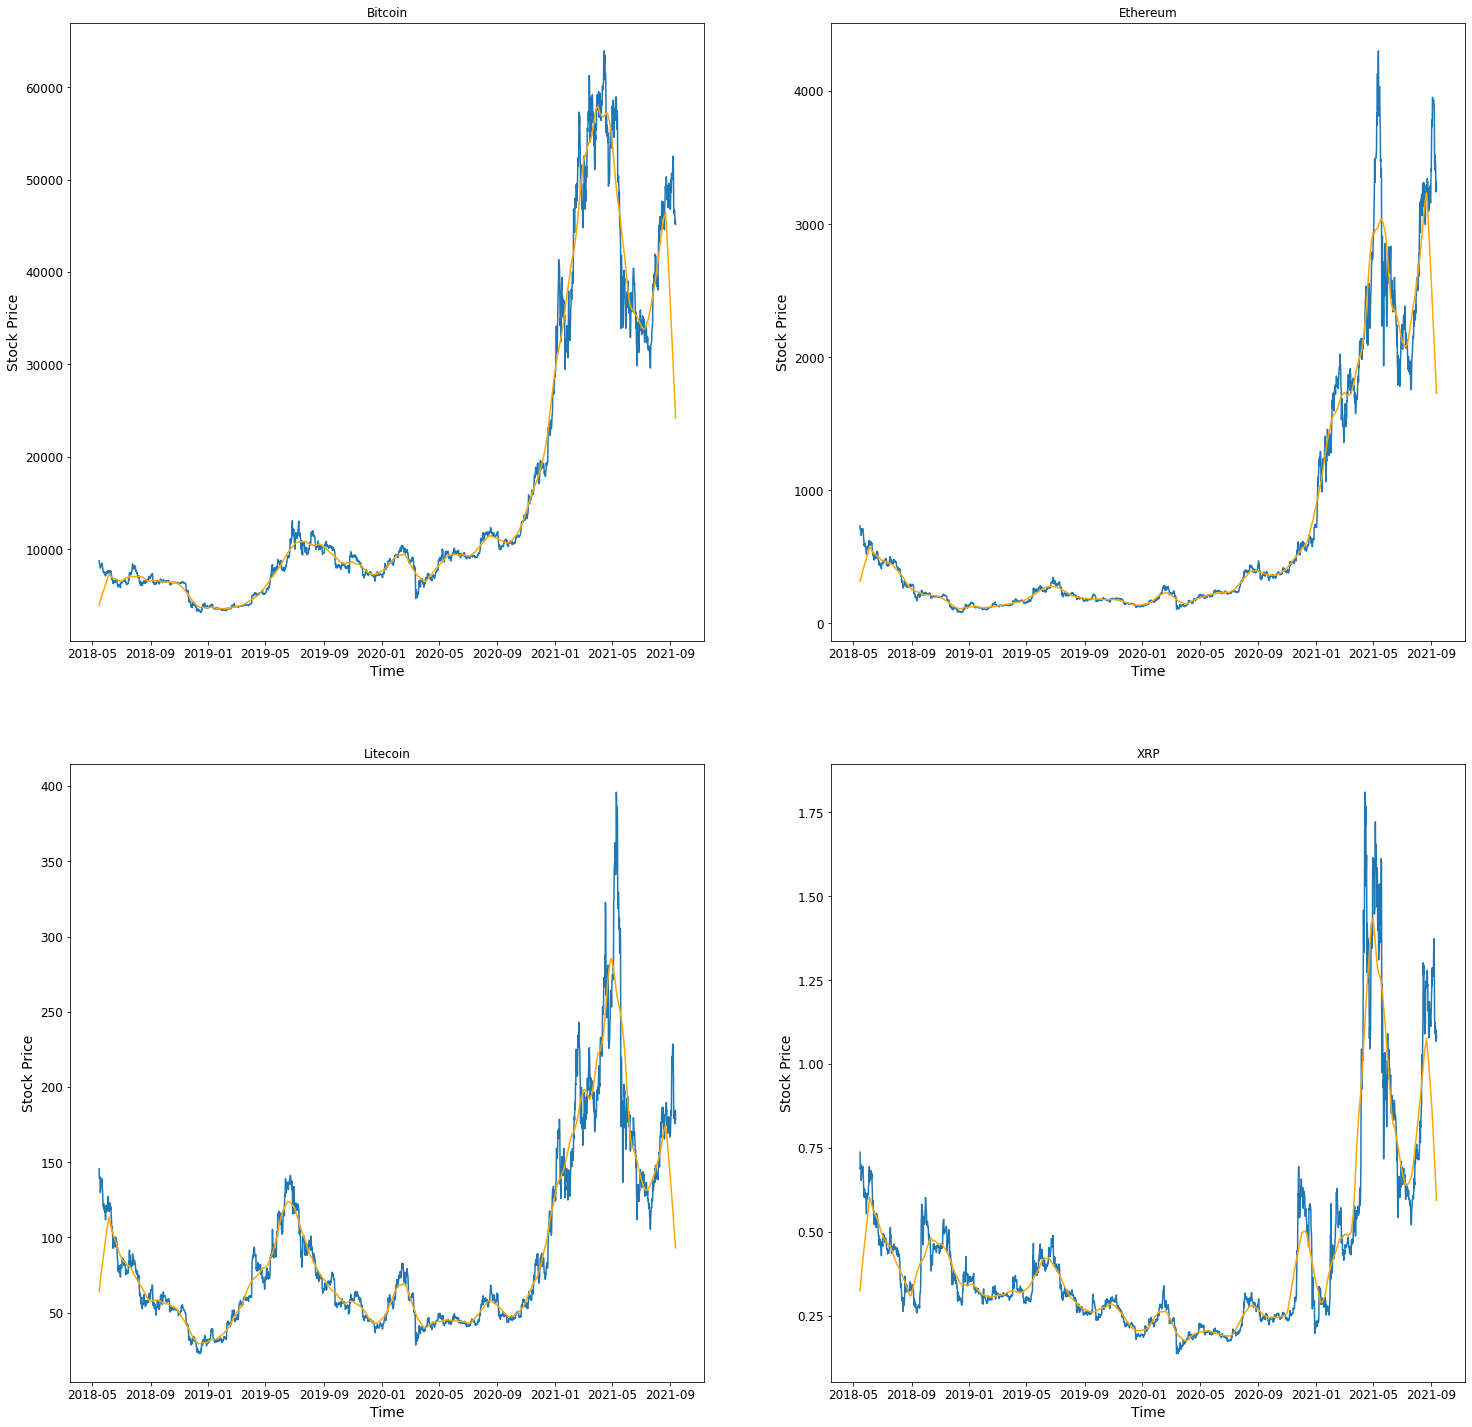

In [23]:
plot_hourly_data_smoothed(btc_hourly[::12], eth_hourly[::12], ltc_hourly[::12], xrp_hourly[::12], 
                         btc_hourly_close_moving_average[::12], eth_hourly_close_moving_average[::12],
                         ltc_hourly_close_moving_average[::12], xrp_hourly_close_moving_average[::12])

Plotting Daily data weekly with Convolution -

This smoothed out plot is also great for our derivative implementation.

In [24]:
eth_daily = eth_daily.iloc[:1401,:]
eth_daily_close_moving_average = pd.DataFrame(eth_daily_close_moving_average, columns=["close"])
eth_daily_close_moving_average = eth_daily_close_moving_average.iloc[:1402,:]

ltc_daily = ltc_daily.iloc[:1540,:]
ltc_daily_close_moving_average = pd.DataFrame(ltc_daily_close_moving_average, columns=["close"])
ltc_daily_close_moving_average = ltc_daily_close_moving_average.iloc[:1540,:]

xrp_daily = xrp_daily.iloc[:1697,:]
xrp_daily_close_moving_average = pd.DataFrame(xrp_daily_close_moving_average, columns=["close"])
xrp_daily_close_moving_average = xrp_daily_close_moving_average.iloc[:1697,:]

In [25]:
xrp_daily

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USD
0,1631145600,2021-09-09,XRP/USD,1.10047,1.11802,1.09872,1.11428,2.831026e+05,3.154555e+05
1,1631059200,2021-09-08,XRP/USD,1.13079,1.14800,1.01488,1.09921,3.531551e+07,3.881917e+07
2,1630972800,2021-09-07,XRP/USD,1.39086,1.39322,0.95003,1.12807,9.312308e+07,1.050494e+08
3,1630886400,2021-09-06,XRP/USD,1.30830,1.41620,1.30830,1.39079,4.005381e+07,5.570644e+07
4,1630800000,2021-09-05,XRP/USD,1.25655,1.31307,1.23736,1.30691,1.083638e+07,1.416218e+07
...,...,...,...,...,...,...,...,...,...
1692,1484956800,2017-01-21,XRP/USD,0.00660,0.00684,0.00652,0.00684,1.395592e+04,2.086817e+06
1693,1484870400,2017-01-20,XRP/USD,0.00674,0.00685,0.00640,0.00660,1.137415e+04,1.713630e+06
1694,1484784000,2017-01-19,XRP/USD,0.00676,0.00688,0.00650,0.00684,1.988233e+04,2.951226e+06
1695,1484697600,2017-01-18,XRP/USD,0.00687,0.00719,0.00664,0.00680,3.801893e+04,5.535202e+06


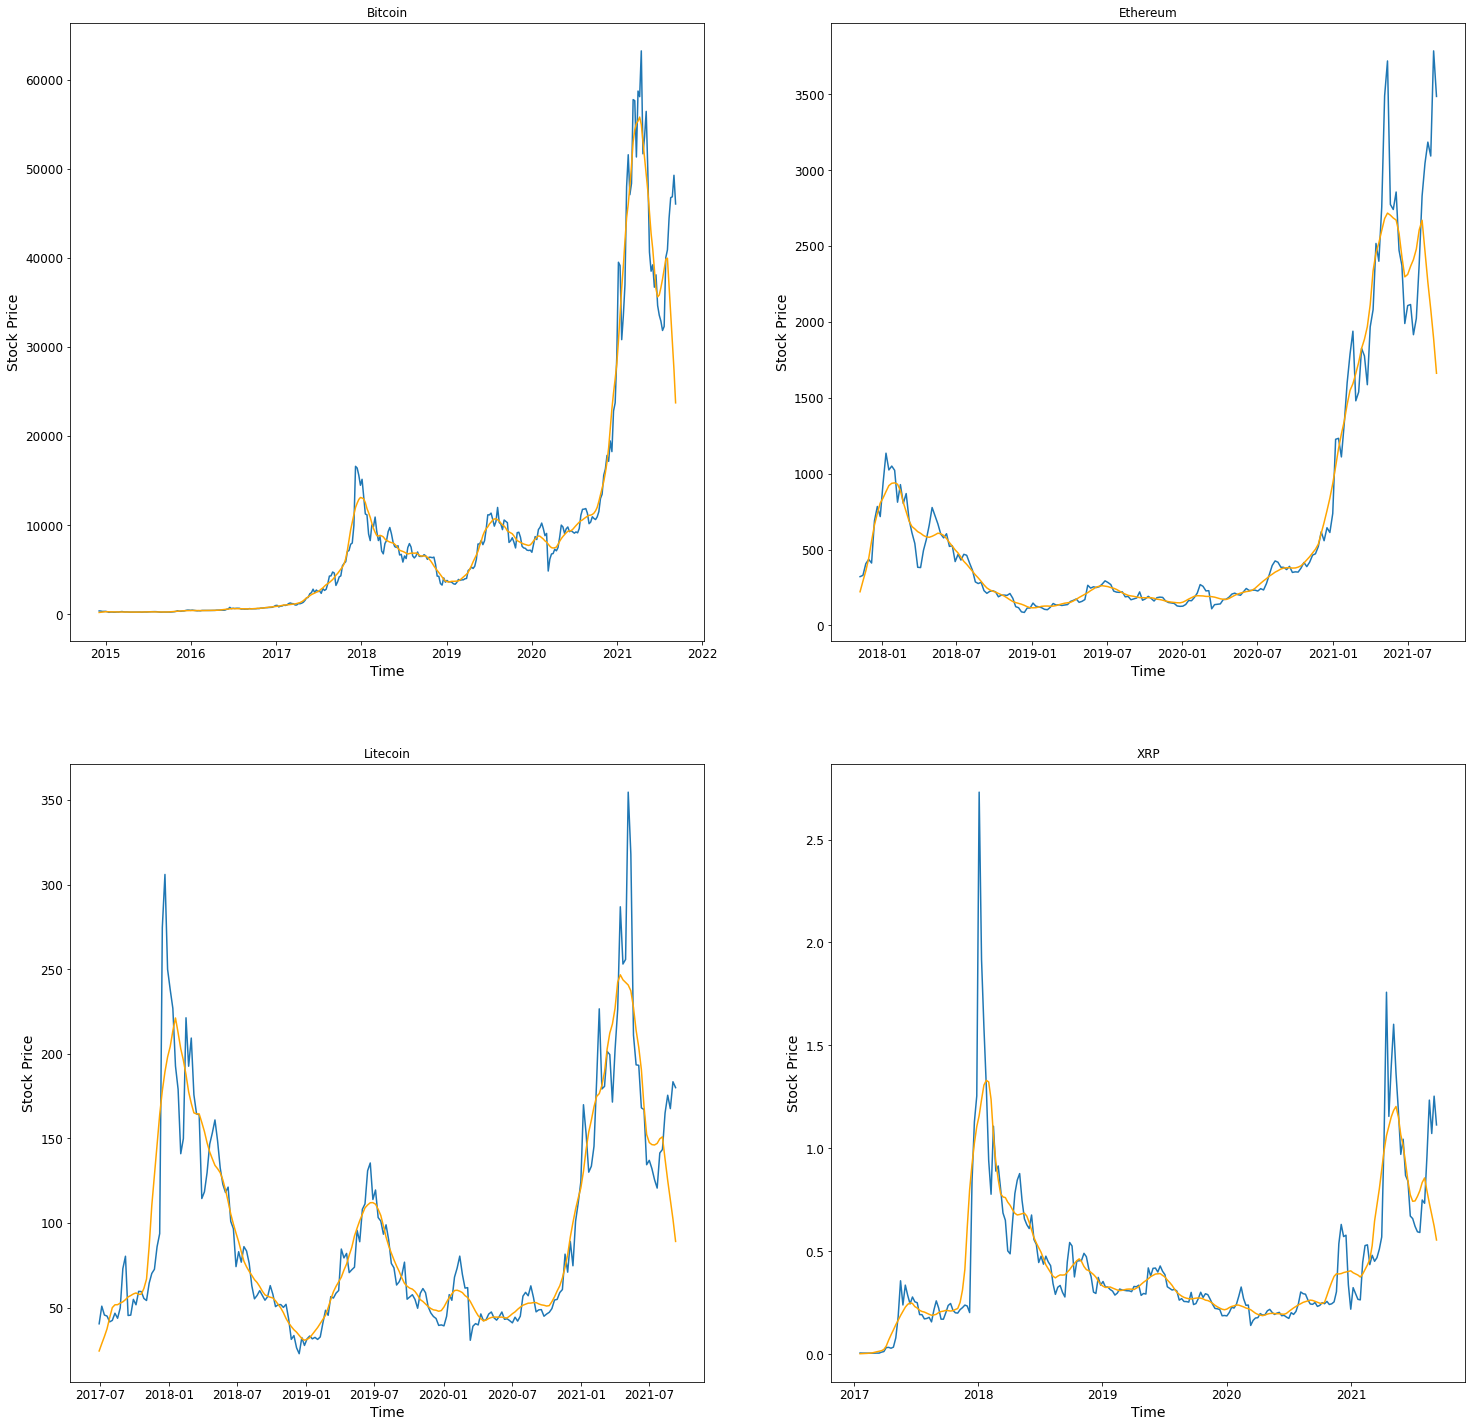

In [26]:
plot_daily_data_smoothed(btc_daily[::7], eth_daily[::7], ltc_daily[::7], xrp_daily[::7], 
                           btc_daily_close_moving_average[::7],
                           eth_daily_close_moving_average[::7], ltc_daily_close_moving_average[::7],
                           xrp_daily_close_moving_average[::7])

<h1><center>Bitcoin</center></h1>

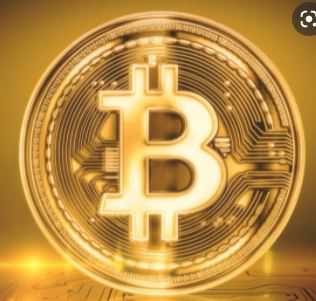

Smoothing Open & Close column -

Below we creating the convoluted data for the columns that we will be using for our derivatives, the open and close columns.

In [27]:
filter_length_minute = 10000
filter_length_hourly = 1000
filter_length_daily = 75

btc_close_minute = np.convolve(btc_minute["close"], np.ones((filter_length_minute)), mode="same")
btc_close_minute /= filter_length_minute
btc_open_minute = np.convolve(btc_minute["open"], np.ones((filter_length_minute)), mode="same")
btc_open_minute /= filter_length_minute

btc_open_hourly = np.convolve(btc_hourly["open"], np.ones((filter_length_hourly)), mode="same")
btc_open_hourly /= filter_length_hourly
btc_close_hourly = np.convolve(btc_hourly["close"], np.ones((filter_length_hourly)), mode="same")
btc_close_hourly /= filter_length_hourly

btc_open_daily = np.convolve(btc_daily["open"], np.ones((filter_length_daily)), mode="same")
btc_open_daily /= filter_length_daily
btc_close_daily = np.convolve(btc_daily["close"], np.ones((filter_length_daily)), mode="same")
btc_close_daily /= filter_length_daily

Converting to a Pandas DataFrame -

Here we are combining our convoluted data. We are concatenating them along with our date and Volume USD columns form the original data.

In [28]:
minute_btc_open = pd.DataFrame(btc_open_minute, columns = ['open'])
minute_btc_close = pd.DataFrame(btc_close_minute, columns = ['close'])

hourly_btc_open = pd.DataFrame(btc_open_hourly, columns = ['open'])
hourly_btc_close = pd.DataFrame(btc_close_hourly, columns = ['close'])

daily_btc_open = pd.DataFrame(btc_open_daily, columns = ['open'])
daily_btc_close = pd.DataFrame(btc_close_daily, columns = ['close'])

btc_minute_convolution = pd.concat([btc_minute["date"], minute_btc_open, minute_btc_close, btc_minute["Volume USD"]], axis=1)
btc_hourly_convolution = pd.concat([btc_hourly["date"], hourly_btc_open, hourly_btc_close, btc_hourly["Volume USD"]], axis=1)
btc_daily_convolution = pd.concat([btc_daily["date"], daily_btc_open, daily_btc_close, btc_daily["Volume USD"]], axis=1)

Creating Intervals for Derivatives and for training - 

Here we are creating the intervals for training. The btc_minute data is at 30-minute interval, so we are shortening the data as if the data we are collecting is every half an hour. The btc_hourly data is shortened to reflect every 12 hours or half a day. The btc_daily data is divided for every 7th day, so we converted this to weekly data.

In [29]:
btc_minute = btc_minute[::30]
btc_hourly = btc_hourly[::12]
btc_daily = btc_daily[::7]

btc_minute_convolution = btc_minute_convolution[::30]
btc_hourly_convolution = btc_hourly_convolution[::12]
btc_daily_convolution = btc_daily_convolution[::7]

Visualizing data

In [30]:
btc_daily_convolution

,date,open,close,Volume USD
0,2021-09-09,23630.475600,23726.359200,2.739859e+06
7,2021-09-02,27369.001867,27490.076667,1.117519e+08
14,2021-08-26,30415.184000,30622.495067,9.798165e+07
21,2021-08-19,33418.031867,33594.814933,1.298288e+08
28,2021-08-12,36569.138933,36737.920400,1.094892e+08
...,...,...,...,...
2443,2015-01-01,281.539200,279.693200,3.223060e+03
2450,2014-12-25,260.668800,258.685067,3.924900e+03
2457,2014-12-18,237.480533,235.923600,2.163758e+04
2464,2014-12-11,217.031333,214.803733,1.653338e+04


### Derivative

Definition - The derivative of f at a can be written as the image below. If the limit exists, then f is said to be differentiable at a. The derivative at a is defined as the rate of change or the slope of the function.

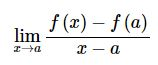

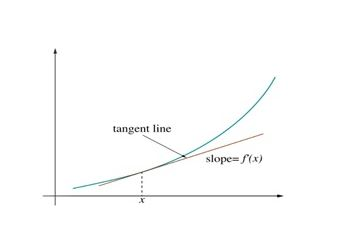

Creating Derivatives - 

Here we are taking the derivative from the open and close points of the graphs of every 30-minute interval, 12 hour interval, and every 7 day interval. We are doing this for both the original data set and the smoothed convolution data.

Rise over run, the slope.

In [31]:
#For Regular Data

btc_minute["Derivative"] = (btc_minute["close"] - btc_minute["open"])/(30-0)
btc_hourly["Derivative"] = (btc_hourly["close"] - btc_hourly["open"])/(12-0)
btc_daily["Derivative"] = (btc_daily["close"] - btc_daily["open"])/(7-0)

#For Smoothed Data

btc_minute_convolution["Derivative"] = (btc_minute_convolution["close"] - btc_minute_convolution["open"])/(30-0)
btc_hourly_convolution["Derivative"] = (btc_hourly_convolution["close"] - btc_hourly_convolution["open"])/(12-0)
btc_daily_convolution["Derivative"] = (btc_daily_convolution["close"] - btc_daily_convolution["open"])/(7-0)

Creating Targets - 

Below we are creating a definition called classify that returns a 1 if the derivative is a positive number and returns a 0 otherwise. We are applying this definition/rule to both of the data sets.

In [32]:
def classify(derivative):
    if derivative > 0:
        return 1
    else:
        return 0

In [33]:
#Creating column "Target" for Regular Data

btc_minute["Target"] = list(map(classify, btc_minute["Derivative"]))
btc_hourly["Target"] = list(map(classify, btc_hourly["Derivative"]))
btc_daily["Target"] = list(map(classify, btc_daily["Derivative"]))

##Creating column "Target" for Smoothed Data

btc_minute_convolution["Target"] = list(map(classify, btc_minute_convolution["Derivative"]))
btc_hourly_convolution["Target"] = list(map(classify, btc_hourly_convolution["Derivative"]))
btc_daily_convolution["Target"] = list(map(classify, btc_daily_convolution["Derivative"]))

### Setting up Trianing and Tests sets

Sorting index from Data, 20% for test and the rest for training.

The cell below is only sorting the index and not the actual values. The data should be sorted but we are doing this to make sure that it is and that the index aligns with the true time series.

I am also taking the length of the index and collecting the last 20 percent that will be used as our validation/test set. 

We are sorting the data instead of sci-kit learns train test split because we cannot have a random data set for training since we are working with a times series. We cannot shuffle the set. I have to use the previous 80% of the data and use the most recent 20% of the data for training. 

In [34]:
times_minute = sorted(btc_minute.index.values)
btc_minute_last20pct = times_minute[int(.20*len(times_minute))]

times_hourly = sorted(btc_hourly.index.values)
btc_hourly_last20pct = times_hourly[int(.20*len(times_hourly))]

times_daily = sorted(btc_daily.index.values)
btc_daily_last20pct = times_daily[int(.20*len(times_daily))]

In [35]:
#For test set

validation_btc_minute_data = btc_minute_convolution[(btc_minute.index < btc_minute_last20pct)]
validation_btc_hourly_data = btc_hourly_convolution[(btc_hourly.index < btc_hourly_last20pct)]
validation_btc_daily_data = btc_daily_convolution[(btc_daily.index < btc_daily_last20pct)]

In [36]:
#For training set

btc_minute_convolution = btc_minute_convolution[(btc_minute.index >= btc_minute_last20pct)]
btc_hourly_convolution = btc_hourly_convolution[(btc_hourly.index >= btc_hourly_last20pct)]
btc_daily_convolution = btc_daily_convolution[(btc_daily.index >= btc_daily_last20pct)]

In [37]:
btc_minute_convolution.shape

(9728, 6)

In [38]:
validation_btc_minute_data.shape

(2431, 6)

Here we see that the btc_minute_convolution is the training set and is equal to 80% (roughly).

In [39]:
9728/(9728+2431)

0.8000657948844477

Splitting up the training and test sets - 

Here I have to manually set up the X_train, y_train, X_test, y_test subsets. The columns that we will be using for training are listed below; open, close, Volume USD, and the derivative column (the actual value). Not the targets themselves.

I am splitting up the sets for all of the intervals we will be using.

In [40]:
#Splitting up minute dataset

X_train_minute = btc_minute_convolution[["open", "close", "Volume USD", "Derivative"]]
y_train_minute = btc_minute_convolution[["Target"]]
X_test_minute = validation_btc_minute_data[["open", "close", "Volume USD", "Derivative"]]
y_test_minute = validation_btc_minute_data[["Target"]]

#Splitting up hourly dataset

X_train_hourly = btc_hourly_convolution[["open", "close", "Volume USD", "Derivative"]]
y_train_hourly = btc_hourly_convolution[["Target"]]
X_test_hourly = validation_btc_hourly_data[["open", "close", "Volume USD", "Derivative"]]
y_test_hourly = validation_btc_hourly_data[["Target"]]

#Splitting up daily dataset

X_train_daily = btc_daily_convolution[["open", "close", "Volume USD", "Derivative"]]
y_train_daily = btc_daily_convolution[["Target"]]
X_test_daily = validation_btc_daily_data[["open", "close", "Volume USD", "Derivative"]]
y_test_daily = validation_btc_daily_data[["Target"]]

Scaling Data - 

We are normalizing the data, also known as Min-Max scaling. The values are being rescaled to values ranging from 0 to 1. The process for this is by getting the difference between the min value and dividing by the max minutes the min. The reason we are doing this because the range of the data is great and we want to bound the data between 0 and 1. This type of scaling, normalization, works great for neural networks since it expects values that range in between 0 and 1. Using normalization also disregards outliers, which we already disregarded when we smoothed the data.

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#Minute data

X_train_minute = scaler.fit_transform(X_train_minute)
y_train_minute = scaler.fit_transform(y_train_minute)
X_test_minute = scaler.fit_transform(X_test_minute)
y_test_minute = scaler.fit_transform(y_test_minute)

#Hourly Data

X_train_hourly = scaler.fit_transform(X_train_hourly)
y_train_hourly = scaler.fit_transform(y_train_hourly)
X_test_hourly = scaler.fit_transform(X_test_hourly)
y_test_hourly = scaler.fit_transform(y_test_hourly)

#Daily Data

X_train_daily = scaler.fit_transform(X_train_daily)
y_train_daily = scaler.fit_transform(y_train_daily)
X_test_daily = scaler.fit_transform(X_test_daily)
y_test_daily = scaler.fit_transform(y_test_daily)

### Presicion Measures

For this particular project we will be using Accuracy as our precision measure. We will be working with classification models and Accuracy will be the preferred measure. The way that Accuracy works is we are calculating the total correct and divide that by the total number of observations. This is how the models will be evaluated.

The reason we will not be using precision and recall is because we are not working with an imbalanced class or dataset. We all remember in our class the not 5 measures in our ML class. Below is a friendly reminder of the Confusion Matrix. I am adding the precision and recall but this will not be the measure of how our models are performing.

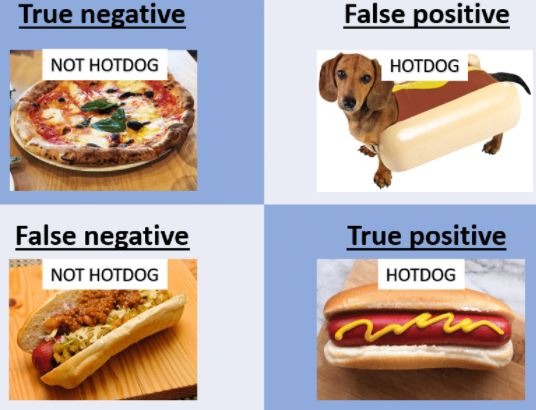

### Training Models

#### Decision Tree

In [42]:
from sklearn.model_selection import GridSearchCV

#Minute Data

tree_clf_minute = DecisionTreeClassifier(max_depth = 8, random_state = 42)
tree_clf_minute.fit(X_train_minute, y_train_minute)

#Hourly Data

tree_clf_hourly = DecisionTreeClassifier(max_depth = 8, random_state = 42)
tree_clf_hourly.fit(X_train_hourly, y_train_hourly)

#Daily Data

tree_clf_daily = DecisionTreeClassifier(max_depth = 8, random_state = 42)
tree_clf_daily.fit(X_train_daily, y_train_daily)

DecisionTreeClassifier(max_depth=8, random_state=42)

Daily Data Cross Validation

In [43]:
# -----
# Coarse-Grained DecisionTreeRegressor GridSearch
# -----

param_grid=[{'min_samples_split':[2,10,50], 'max_depth': [2,10,15]}]

grid_search = GridSearchCV(tree_clf_daily, param_grid, cv=5)

grid_search.fit(X_train_daily, y_train_daily)
grid_search.best_params_

{'max_depth': 2, 'min_samples_split': 2}

In [44]:
# -----
# Final-Grained DecisionTreeRegressor GridSearch
# -----

param_grid=[{'min_samples_split': list(range(1,5)), 'max_depth': list(range(1,5))}]

grid_search = GridSearchCV(tree_clf_daily, param_grid, cv=5)

grid_search.fit(X_train_daily, y_train_daily)
grid_search.best_params_

{'max_depth': 1, 'min_samples_split': 2}

In [45]:
tree_clf_daily = DecisionTreeClassifier(max_depth = 1, min_samples_split=2, random_state = 42)
tree_clf_daily.fit(X_train_daily, y_train_daily)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [46]:
tree_preds = tree_clf_daily.predict(X_test_daily)
acc_score = accuracy_score(y_test_daily, tree_preds)
pres_score = precision_score(y_test_daily, tree_preds)
rec_score = recall_score(y_test_daily, tree_preds)

print('Accuracy=%s' % (acc_score))
print('Precision=%s' % (pres_score))
print('Recall=%s' % (rec_score))

Accuracy=0.9714285714285714
Precision=0.9666666666666667
Recall=1.0


Our predicted values for the next weeks are: 

In [47]:
tree_preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

Hourly Data Cross Validation

In [48]:
# -----
# Coarse-Grained DecisionTreeRegressor GridSearch
# -----

param_grid=[{'min_samples_split':[2,10,50], 'max_depth': [2,10,15]}]

grid_search = GridSearchCV(tree_clf_hourly, param_grid, cv=5)

grid_search.fit(X_train_hourly, y_train_hourly)
grid_search.best_params_

{'max_depth': 2, 'min_samples_split': 2}

In [49]:
# -----
# Final-Grained DecisionTreeRegressor GridSearch
# -----

param_grid=[{'min_samples_split': list(range(1,5)), 'max_depth': list(range(1,5))}]

grid_search = GridSearchCV(tree_clf_hourly, param_grid, cv=5)

grid_search.fit(X_train_hourly, y_train_hourly)
grid_search.best_params_

{'max_depth': 1, 'min_samples_split': 2}

In [50]:
tree_clf_hourly = DecisionTreeClassifier(max_depth = 1, min_samples_split=2, random_state = 42)
tree_clf_hourly.fit(X_train_hourly, y_train_hourly)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [51]:
tree_preds = tree_clf_hourly.predict(X_test_hourly)
acc_score = accuracy_score(y_test_hourly, tree_preds)
pres_score = precision_score(y_test_hourly, tree_preds)
rec_score = recall_score(y_test_hourly, tree_preds)

print('Accuracy=%s' % (acc_score))
print('Precision=%s' % (pres_score))
print('Recall=%s' % (rec_score))

Accuracy=0.6954732510288066
Precision=0.6621004566210046
Recall=1.0


Our predicted values for the 12-hour intervals are:

In [52]:
tree_preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0.

Minute Data Cross Validation

In [53]:
# -----
# Coarse-Grained DecisionTreeRegressor GridSearch
# -----

param_grid=[{'min_samples_split':[2,10,50], 'max_depth': [35,50,65]}]

grid_search = GridSearchCV(tree_clf_minute, param_grid, cv=5)

grid_search.fit(X_train_minute, y_train_minute)
grid_search.best_params_

{'max_depth': 35, 'min_samples_split': 2}

In [54]:
# -----
# Final-Grained DecisionTreeRegressor GridSearch
# -----

param_grid=[{'min_samples_split': list(range(1,5)), 'max_depth': [25,35,40]}]

grid_search = GridSearchCV(tree_clf_minute, param_grid, cv=5)

grid_search.fit(X_train_minute, y_train_minute)
grid_search.best_params_

{'max_depth': 25, 'min_samples_split': 2}

In [55]:
tree_clf_minute = DecisionTreeClassifier(max_depth = 25, min_samples_split=2, random_state = 42)
tree_clf_minute.fit(X_train_minute, y_train_minute)

DecisionTreeClassifier(max_depth=25, random_state=42)

In [56]:
tree_preds = tree_clf_minute.predict(X_test_minute)
acc_score = accuracy_score(y_test_minute, tree_preds)
pres_score = precision_score(y_test_minute, tree_preds)
rec_score = recall_score(y_test_minute, tree_preds)

print('Accuracy=%s' % (acc_score))
print('Precision=%s' % (pres_score))
print('Recall=%s' % (rec_score))

Accuracy=0.6260798025503908
Precision=1.0
Recall=0.513903743315508


Our predicted values for the minute data are:

In [57]:
tree_preds

array([0., 0., 0., ..., 1., 1., 1.])

#### Gradient Boosting

In [58]:
#Minute

grbt_minute = GradientBoostingClassifier(learning_rate=.1, max_depth=2, random_state=42)
grbt_minute.fit(X_train_minute, np.ravel(y_train_minute))

#Hourly

grbt_hourly = GradientBoostingClassifier(learning_rate=.1, max_depth=2, random_state=42)
grbt_hourly.fit(X_train_hourly, np.ravel(y_train_hourly))

#Daily

grbt_daily = GradientBoostingClassifier(learning_rate=.1, max_depth=2, random_state=42)
grbt_daily.fit(X_train_daily, np.ravel(y_train_daily))

GradientBoostingClassifier(max_depth=2, random_state=42)

Daily Data Cross Validation

In [59]:
# -----
# Refined GradientBoostingRegressor GridSearch
# -----

param_grid=[{'n_estimators':[10,20,30,40,50,60,70,80,90], 'learning_rate':[.1, .5, 1.0 , 1.5, 2.0], 'max_depth': [1,2,3]}]

grid_search = GridSearchCV(grbt_daily, param_grid, cv=5)

grid_search.fit(X_train_daily, np.ravel(y_train_daily))
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 10}

In [60]:
# -----
# Final GradientBoostingRegressor GridSearch
# -----

param_grid=[{'n_estimators': list(range(5,15)), 'learning_rate':[.1], 'max_depth': [1]}]

grid_search = GridSearchCV(grbt_daily, param_grid, cv=5)

grid_search.fit(X_train_daily, np.ravel(y_train_daily))
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 5}

In [61]:
grbt_daily = GradientBoostingClassifier(n_estimators=5, learning_rate=1.0, max_depth=1, random_state=42)
grbt_daily.fit(X_train_daily, np.ravel(y_train_daily))

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=5,
                           random_state=42)

In [62]:
preds = grbt_daily.predict(X_test_daily)
acc_score = accuracy_score(y_test_daily, preds)
pres_score = precision_score(y_test_daily, preds)
rec_score = recall_score(y_test_daily, preds)

print('Accuracy=%s' % (acc_score))
print('Precision=%s' % (pres_score))
print('Recall=%s' % (rec_score))

Accuracy=0.9714285714285714
Precision=0.9666666666666667
Recall=1.0


Hourly Cross Validation

In [63]:
# -----
# Refined GradientBoostingRegressor GridSearch
# -----

param_grid=[{'n_estimators':[10,30,50,70,90], 'learning_rate':[.1, 1.0, 2.0], 'max_depth': [1,2,3]}]

grid_search = GridSearchCV(grbt_hourly, param_grid, cv=5)

grid_search.fit(X_train_hourly, np.ravel(y_train_hourly))
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 10}

In [64]:
# -----
# Final GradientBoostingRegressor GridSearch
# -----

param_grid=[{'n_estimators': [8,9,10,11,12], 'learning_rate':[.1], 'max_depth': [1]}]

grid_search = GridSearchCV(grbt_hourly, param_grid, cv=5)

grid_search.fit(X_train_hourly, np.ravel(y_train_hourly))
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 8}

In [65]:
grbt_hourly = GradientBoostingClassifier(n_estimators=8, learning_rate=.1, max_depth=1, random_state=42)
grbt_hourly.fit(X_train_hourly, np.ravel(y_train_hourly))

GradientBoostingClassifier(max_depth=1, n_estimators=8, random_state=42)

In [66]:
preds = grbt_hourly.predict(X_test_hourly)
acc_score = accuracy_score(y_test_hourly, preds)
pres_score = precision_score(y_test_hourly, preds)
rec_score = recall_score(y_test_hourly, preds)

print('Accuracy=%s' % (acc_score))
print('Precision=%s' % (pres_score))
print('Recall=%s' % (rec_score))

Accuracy=0.6954732510288066
Precision=0.6621004566210046
Recall=1.0


Minute Data Cross Validation

In [67]:
# -----
# Refined GradientBoostingRegressor GridSearch
# -----

param_grid=[{'n_estimators':[10,30,50,70,90], 'learning_rate':[.1, 1.0, 2.0], 'max_depth': [1,2,3]}]

grid_search = GridSearchCV(grbt_minute, param_grid, cv=5)

grid_search.fit(X_train_minute, np.ravel(y_train_minute))
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 10}

In [68]:
# -----
# Final GradientBoostingRegressor GridSearch
# -----

param_grid=[{'n_estimators':[8,9,10,11,12], 'learning_rate':[.1], 'max_depth': [1]}]

grid_search = GridSearchCV(grbt_minute, param_grid, cv=5)

grid_search.fit(X_train_minute, np.ravel(y_train_minute))
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 8}

In [69]:
grbt_minute = GradientBoostingClassifier(n_estimators=8, learning_rate=.1, max_depth=1, random_state=42)
grbt_minute.fit(X_train_minute, np.ravel(y_train_minute))

GradientBoostingClassifier(max_depth=1, n_estimators=8, random_state=42)

In [70]:
preds = grbt_minute.predict(X_test_minute)
acc_score = accuracy_score(y_test_minute, tree_preds)
pres_score = precision_score(y_test_minute, tree_preds)
rec_score = recall_score(y_test_minute, tree_preds)

print('Accuracy=%s' % (acc_score))
print('Precision=%s' % (pres_score))
print('Recall=%s' % (rec_score))

Accuracy=0.6260798025503908
Precision=1.0
Recall=0.513903743315508


#### Random Forest

In [71]:
#Minute

rnd_clf_minute = RandomForestClassifier(n_estimators=250, max_depth=5, min_samples_split=14, random_state=42)
rnd_clf_minute.fit(X_train_minute, np.ravel(y_train_minute))

#Hourly

rnd_clf_hourly = RandomForestClassifier(n_estimators=250, max_depth=5, min_samples_split=14, random_state=42)
rnd_clf_hourly.fit(X_train_hourly, np.ravel(y_train_hourly))

#Daily

rnd_clf_daily = RandomForestClassifier(n_estimators=250, max_depth=5, min_samples_split=14, random_state=42)
rnd_clf_daily.fit(X_train_daily, np.ravel(y_train_daily))

RandomForestClassifier(max_depth=5, min_samples_split=14, n_estimators=250,
                       random_state=42)

Daily Data Cross Validation

In [72]:
# -----
# Coarse-Grained RandomForestRegressor GridSearch
# -----

param_grid=[{'n_estimators':[1,10,50,100,250,500,1000], 'min_samples_split':[2,10,50], 'max_depth': [1,10,100]}]

grid_search = GridSearchCV(rnd_clf_daily, param_grid, cv=5)

grid_search.fit(X_train_daily, np.ravel(y_train_daily))
grid_search.best_params_

{'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 50}

In [73]:
# -----
# Final-Grained RandomForestRegressor GridSearch
# -----

param_grid=[{'n_estimators':[40,45,50,55,60], 'min_samples_split':[2], 'max_depth': [1]}]

grid_search = GridSearchCV(rnd_clf_daily, param_grid, cv=5)

grid_search.fit(X_train_daily, np.ravel(y_train_daily))
grid_search.best_params_

{'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 40}

In [74]:
rnd_clf_daily = RandomForestClassifier(n_estimators=40, max_depth=1, min_samples_split=2, random_state=42)
rnd_clf_daily.fit(X_train_daily, np.ravel(y_train_daily))

RandomForestClassifier(max_depth=1, n_estimators=40, random_state=42)

In [75]:
preds = rnd_clf_daily.predict(X_test_daily)
acc_score = accuracy_score(y_test_daily, preds)
pres_score = precision_score(y_test_daily, preds)
rec_score = recall_score(y_test_daily, preds)

print('Accuracy=%s' % (acc_score))
print('Precision=%s' % (pres_score))
print('Recall=%s' % (rec_score))

Accuracy=0.9714285714285714
Precision=0.9666666666666667
Recall=1.0


Hourly Data Cross Validation

In [76]:
# -----
# Coarse-Grained RandomForestRegressor GridSearch
# -----

param_grid=[{'n_estimators':[1,10,50,100], 'min_samples_split':[2,10], 'max_depth': [1,10,50]}]

grid_search = GridSearchCV(rnd_clf_hourly, param_grid, cv=5)

grid_search.fit(X_train_hourly, np.ravel(y_train_hourly))
grid_search.best_params_

{'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 10}

In [77]:
# -----
# Final-Grained RandomForestRegressor GridSearch
# -----

param_grid=[{'n_estimators':[8,9,10,11,12], 'min_samples_split':[2], 'max_depth': [1]}]

grid_search = GridSearchCV(rnd_clf_hourly, param_grid, cv=5)

grid_search.fit(X_train_hourly, np.ravel(y_train_hourly))
grid_search.best_params_

{'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 8}

In [78]:
rnd_clf_hourly = RandomForestClassifier(n_estimators=8, max_depth=1, min_samples_split=2, random_state=42)
rnd_clf_hourly.fit(X_train_hourly, np.ravel(y_train_hourly))

RandomForestClassifier(max_depth=1, n_estimators=8, random_state=42)

In [79]:
preds = rnd_clf_hourly.predict(X_test_hourly)
acc_score = accuracy_score(y_test_hourly, preds)
pres_score = precision_score(y_test_hourly, preds)
rec_score = recall_score(y_test_hourly, preds)

print('Accuracy=%s' % (acc_score))
print('Precision=%s' %(pres_score))
print('Recall=%s' % (rec_score))

Accuracy=0.6954732510288066
Precision=0.6621004566210046
Recall=1.0


Minute Dataset

In [80]:
# -----
# Coarse-Grained RandomForestRegressor GridSearch
# -----

param_grid=[{'n_estimators':[1,10,50,100], 'min_samples_split':[2,10], 'max_depth': [1,10,50]}]

grid_search = GridSearchCV(rnd_clf_minute, param_grid, cv=5)

grid_search.fit(X_train_minute, np.ravel(y_train_minute))
grid_search.best_params_

{'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 1}

In [81]:
# -----
# Final-Grained RandomForestRegressor GridSearch
# -----

param_grid=[{'n_estimators': list(range(1,5)), 'min_samples_split':[2], 'max_depth': [1]}]

grid_search = GridSearchCV(rnd_clf_minute, param_grid, cv=5)

grid_search.fit(X_train_minute, np.ravel(y_train_minute))
grid_search.best_params_

{'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 1}

In [82]:
rnd_clf_minute = RandomForestClassifier(n_estimators=8, max_depth=1, min_samples_split=2, random_state=42)
rnd_clf_minute.fit(X_train_minute, np.ravel(y_train_minute))

RandomForestClassifier(max_depth=1, n_estimators=8, random_state=42)

In [83]:
preds = rnd_clf_minute.predict(X_test_minute)
acc_score = accuracy_score(y_test_minute, preds)
pres_score = precision_score(y_test_minute, preds)
rec_score = recall_score(y_test_minute, preds)

print('Accuracy=%s' % (acc_score))
print('Precision=%s' %(pres_score))
print('Recall=%s' % (rec_score))

Accuracy=0.6260798025503908
Precision=1.0
Recall=0.513903743315508


Review:

Here we note that all of the models produce the same accuracy. The Decision Tree, Gradient Descent, and Random Forest are getting the same results. Even though they are different models and have different parameters in their cross validations. This should tell us that our accuracy is close to being correct.

#### Artificial Neural Network

Here we are creating a model using Sequential API. After tweaking the nuerons and parameters I was able to come up with the models below. 

Our activation is the rectified linear. We then call the compile() method to define the loss function and optimizer. Since we are doing a binary classification then our output layer will be 'sigmoid' and our loss function will be "binary_crossentropy". The optimizer we will use is Stochastic Gradient Descent ("sgd").

Daily Dataset

In [84]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train_daily.shape[1:]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train_daily, y_train_daily, epochs=100, validation_data=(X_test_daily, y_test_daily))

Epoch 1/100
9/9 [==============================] - 0s 16ms/step - loss: 0.6928 - accuracy: 0.5317 - val_loss: 0.6888 - val_accuracy: 0.8143
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5880 - val_loss: 0.6823 - val_accuracy: 0.8286
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5810 - val_loss: 0.6765 - val_accuracy: 0.8286
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.5739 - val_loss: 0.6710 - val_accuracy: 0.8286
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5739 - val_loss: 0.6660 - val_accuracy: 0.8286
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.5739 - val_loss: 0.6615 - val_accuracy: 0.8286
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6811 - accuracy: 0.5739 - val_loss: 0.6572 - val_accuracy: 0.8286
Epoch 8/100
9/9 [=========

Epoch 59/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.6831 - val_loss: 0.5534 - val_accuracy: 0.9429
Epoch 60/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6419 - accuracy: 0.6796 - val_loss: 0.5526 - val_accuracy: 0.9429
Epoch 61/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6412 - accuracy: 0.6901 - val_loss: 0.5510 - val_accuracy: 0.9429
Epoch 62/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6406 - accuracy: 0.6901 - val_loss: 0.5497 - val_accuracy: 0.9429
Epoch 63/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6401 - accuracy: 0.6972 - val_loss: 0.5481 - val_accuracy: 0.9429
Epoch 64/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6395 - accuracy: 0.6972 - val_loss: 0.5466 - val_accuracy: 0.9429
Epoch 65/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6390 - accuracy: 0.7007 - val_loss: 0.5451 - val_accuracy: 0.9429
Epoch 66/100
9/9 [==

Saving figure keras_learning_curves_plot


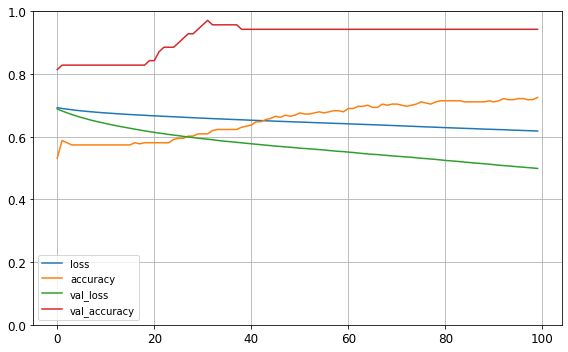

In [85]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

If the performance of the training set is better that the validation set then the model is more than likely overfitting the training set. 

Here we see that the accuracy for the training set is catching up with the validation accuracy, so this is a good sign. Also, the training loss is decreasing substantially along with the validation loss. So there does not seem to be too much overfitting at all. It looks like the training set will eventually converge with the validation set.

The model summary displays all of the models names, the neurons and the number of parameters. Note that the dense_1 layer has a total of 30,100 (300*100 + 100 biased terms) parameter. This allows the model quite a bit of felxibility. But if we have a lot of data we might run the risk of overfitting.

In [86]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 300)               1500      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 31,701
Trainable params: 31,701
Non-trainable params: 0
_________________________________________________________________


Below are the weights or the values of the parameters of the layer.

In [87]:
model.layers
hidden1 = model.layers[1]
model.get_layer("dense")

weights, biases  = hidden1.get_weights()
weights

array([[-0.08038304, -0.13060904,  0.08159867, ...,  0.08618812,
        -0.08149172,  0.12088612],
       [ 0.05807373,  0.07308252, -0.13520083, ..., -0.08830996,
         0.07783398, -0.02851116],
       [-0.00742278,  0.02510618,  0.05315298, ..., -0.09308078,
         0.01272201, -0.09039006],
       [ 0.01456738, -0.12799677, -0.10837465, ...,  0.14711212,
        -0.02717751,  0.07902472]], dtype=float32)

Here we will evaluate our model to the test set to estimate the generalization error.

In [88]:
model.evaluate(X_test_daily, y_test_daily)

3/3 [==============================] - 0s 333us/step - loss: 0.4988 - accuracy: 0.9429


[0.49880725145339966, 0.9428571462631226]

Lastly, we will use the predict() method to make predictions.

In [89]:
X_new = X_test_daily[:3]

In [90]:
y_proba = model.predict(X_new)

In [91]:
y_proba

array([[0.6332153 ],
       [0.6087893 ],
       [0.61773366]], dtype=float32)

Hourly Dataset

In [92]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train_hourly.shape[1:]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train_hourly, y_train_hourly, epochs=100, validation_data=(X_test_hourly, y_test_hourly))

Epoch 1/100
61/61 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5560 - val_loss: 0.6712 - val_accuracy: 0.5967
Epoch 2/100
61/61 [==============================] - 0s 850us/step - loss: 0.6780 - accuracy: 0.5560 - val_loss: 0.6605 - val_accuracy: 0.5967
Epoch 3/100
61/61 [==============================] - 0s 932us/step - loss: 0.6729 - accuracy: 0.5560 - val_loss: 0.6536 - val_accuracy: 0.5967
Epoch 4/100
61/61 [==============================] - 0s 899us/step - loss: 0.6693 - accuracy: 0.5560 - val_loss: 0.6481 - val_accuracy: 0.5967
Epoch 5/100
61/61 [==============================] - 0s 916us/step - loss: 0.6661 - accuracy: 0.5560 - val_loss: 0.6434 - val_accuracy: 0.5967
Epoch 6/100
61/61 [==============================] - 0s 899us/step - loss: 0.6632 - accuracy: 0.5560 - val_loss: 0.6392 - val_accuracy: 0.5967
Epoch 7/100
61/61 [==============================] - 0s 932us/step - loss: 0.6603 - accuracy: 0.5560 - val_loss: 0.6355 - val_accuracy: 0.5967
E

Epoch 58/100
61/61 [==============================] - 0s 817us/step - loss: 0.3260 - accuracy: 0.9789 - val_loss: 1.3935 - val_accuracy: 0.6667
Epoch 59/100
61/61 [==============================] - 0s 834us/step - loss: 0.3182 - accuracy: 0.9846 - val_loss: 1.4748 - val_accuracy: 0.6626
Epoch 60/100
61/61 [==============================] - 0s 834us/step - loss: 0.3106 - accuracy: 0.9846 - val_loss: 1.4987 - val_accuracy: 0.6687
Epoch 61/100
61/61 [==============================] - 0s 834us/step - loss: 0.3027 - accuracy: 0.9841 - val_loss: 1.5337 - val_accuracy: 0.6687
Epoch 62/100
61/61 [==============================] - 0s 883us/step - loss: 0.2956 - accuracy: 0.9877 - val_loss: 1.6249 - val_accuracy: 0.6646
Epoch 63/100
61/61 [==============================] - 0s 785us/step - loss: 0.2889 - accuracy: 0.9764 - val_loss: 1.5469 - val_accuracy: 0.6790
Epoch 64/100
61/61 [==============================] - 0s 837us/step - loss: 0.2825 - accuracy: 0.9846 - val_loss: 1.6420 - val_accuracy:

Saving figure keras_learning_curves_plot


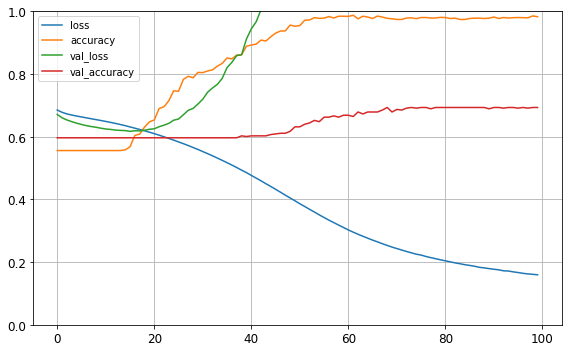

In [93]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [94]:
model.evaluate(X_test_hourly, y_test_hourly)

16/16 [==============================] - 0s 686us/step - loss: 3.2372 - accuracy: 0.6934


[3.2372257709503174, 0.693415641784668]

Minute Dataset

In [95]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train_minute.shape[1:]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train_minute, y_train_minute, epochs=100, validation_data=(X_test_minute, y_test_minute))

Epoch 1/100
304/304 [==============================] - 0s 919us/step - loss: 0.5506 - accuracy: 0.7436 - val_loss: 0.4891 - val_accuracy: 0.7692
Epoch 2/100
304/304 [==============================] - 0s 650us/step - loss: 0.5054 - accuracy: 0.7436 - val_loss: 0.4597 - val_accuracy: 0.7692
Epoch 3/100
304/304 [==============================] - 0s 634us/step - loss: 0.4757 - accuracy: 0.7439 - val_loss: 0.4313 - val_accuracy: 0.7692
Epoch 4/100
304/304 [==============================] - 0s 666us/step - loss: 0.4371 - accuracy: 0.7656 - val_loss: 0.4032 - val_accuracy: 0.8675
Epoch 5/100
304/304 [==============================] - 0s 652us/step - loss: 0.3899 - accuracy: 0.7843 - val_loss: 0.3932 - val_accuracy: 0.9881
Epoch 6/100
304/304 [==============================] - 0s 656us/step - loss: 0.3385 - accuracy: 0.8262 - val_loss: 0.4282 - val_accuracy: 0.7812
Epoch 7/100
304/304 [==============================] - 0s 620us/step - loss: 0.2887 - accuracy: 0.8730 - val_loss: 0.4667 - val_ac

Saving figure keras_learning_curves_plot


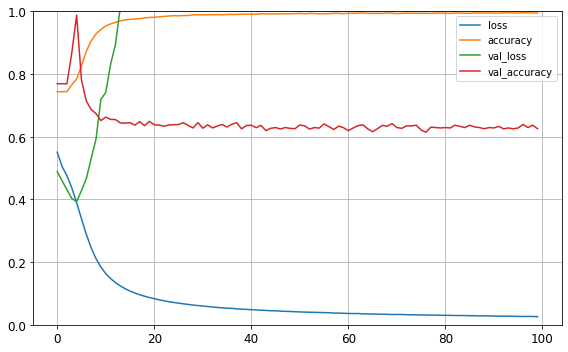

In [96]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [97]:
model.evaluate(X_test_minute, y_test_minute)

76/76 [==============================] - 0s 485us/step - loss: 3.7642 - accuracy: 0.6257


[3.764152765274048, 0.625668466091156]

### Exponential Smoothing

With time series data we can divide it into three components: a trend component, seasonal component, irregularity component. The reason there are three is for the different types of time series data that is collected, example the seasonality. Trend component means that you clearly see the data increasing or decreasing over time. Seasonal component is where there are seasonal increases such as clothing stores during Christmas. Irregularity component is when there are unexpected events, such as Elon Musk tweets changing the cryptocurrency volumes. Exponential smoothing has an advantage because it decomposes your time series data, and it makes it easier to work with. Whereas the moving averages the past observations and are weighed equally, exponential functions are used to assign exponentially decreasing weights.

Single exponential smoothing considers the more recent time or more recent observations that the older observations. So, it adds more weight to the more current observations while still considering all of the observations. It does not consider any trends or seasonality.

Double exponential smoothing (simple exponential smoothing) helps capture the trend pattern while at the same time using single exponential smoothing. 

Triple exponential smoothing (Holt) helps capture trend and seasonal components.

I chose simple exponential smoothing because it is a forecasting method that does not use or consider a trend or seasonality. It requires a single parameter, which is the smoothing factor. The parameter has to be set between 0 and 1. Large values means that the model pays attention mainly to the most recent past observations, whereas smaller values mean more of the history is considered when making a prediction.


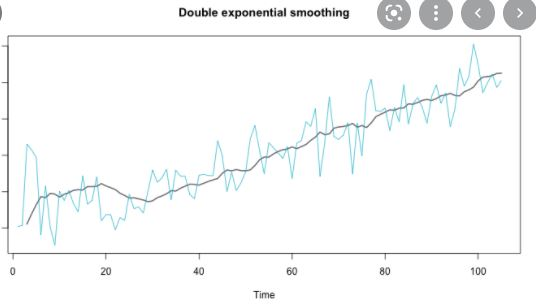

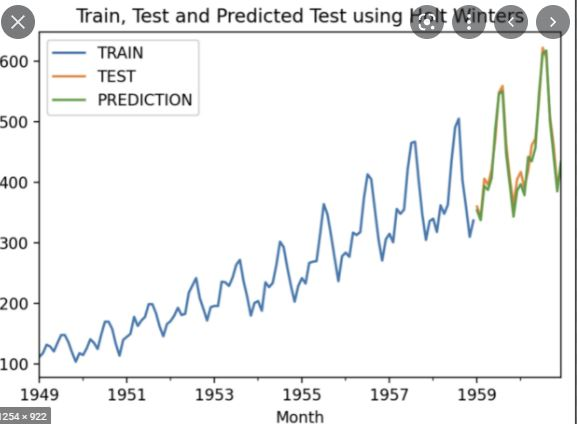

### Smoothing Data - Exponential

In [99]:
path = r"C:\Users\mnava\OneDrive\Final Project - Crypto\Data sets\Minute by Minute"
os.chdir(path)

btc_minute = pd.read_csv("Bitstamp_BTCUSD_2021_minute.csv")
eth_minute = pd.read_csv("Bitstamp_ETHUSD_2021_minute.csv")
ltc_minute = pd.read_csv("Bitstamp_LTCUSD_2021_minute.csv")
xrp_minute = pd.read_csv("Bitstamp_XRPUSD_2021_minute.csv")


path = r"C:\Users\mnava\OneDrive\Final Project - Crypto\Data sets\Hourly"
os.chdir(path)

btc_hourly = pd.read_csv("Bitstamp_BTCUSD_1h.csv")
eth_hourly = pd.read_csv("Bitstamp_ETHUSD_1h.csv")
ltc_hourly = pd.read_csv("Bitstamp_LTCUSD_1h.csv")
xrp_hourly = pd.read_csv("Bitstamp_XRPUSD_1h.csv")


path = r"C:\Users\mnava\OneDrive\Final Project - Crypto\Data sets\Daily"
os.chdir(path)

btc_daily = pd.read_csv("Bitstamp_BTCUSD_daily.csv")
eth_daily = pd.read_csv("Bitstamp_ETHUSD_daily.csv")
ltc_daily = pd.read_csv("Bitstamp_LTCUSD_daily.csv")
xrp_daily = pd.read_csv("Bitstamp_XRPUSD_daily.csv")

Converting Date Column Type

In [100]:
btc_minute.date = pd.to_datetime(btc_minute.date)

btc_hourly.date = pd.to_datetime(btc_hourly.date)

btc_daily.date = pd.to_datetime(btc_daily.date)

Smoothing Data

In [101]:
model1 = SimpleExpSmoothing(btc_minute["open"]).fit(smoothing_level=.2, optimized=False)
model2 = SimpleExpSmoothing(btc_hourly["open"]).fit(smoothing_level=.2, optimized=False)
model3 = SimpleExpSmoothing(btc_daily["open"]).fit(smoothing_level=.2, optimized=False)
model4 = SimpleExpSmoothing(btc_minute["close"]).fit(smoothing_level=.2, optimized=False)
model5 = SimpleExpSmoothing(btc_hourly["close"]).fit(smoothing_level=.2, optimized=False)
model6 = SimpleExpSmoothing(btc_daily["close"]).fit(smoothing_level=.2, optimized=False)

Converting Pandas Series to Pandas Data Frames

In [102]:
df1 = pd.DataFrame(model1.fittedvalues, columns=["open"])
df2 = pd.DataFrame(model2.fittedvalues, columns=["open"])
df3 = pd.DataFrame(model3.fittedvalues, columns=["open"])
df4 = pd.DataFrame(model4.fittedvalues, columns=["close"])
df5 = pd.DataFrame(model5.fittedvalues, columns=["close"])
df6 = pd.DataFrame(model6.fittedvalues, columns=["close"])

btc_minute_data = pd.concat([btc_minute["date"], df1, df4, btc_minute["Volume USD"]], axis=1)
btc_hourly_data = pd.concat([btc_hourly["date"], df2, df5, btc_hourly["Volume USD"]], axis=1)
btc_daily_data = pd.concat([btc_daily["date"], df3, df6, btc_daily["Volume USD"]], axis=1)

#### Visualizing Smoothed Data

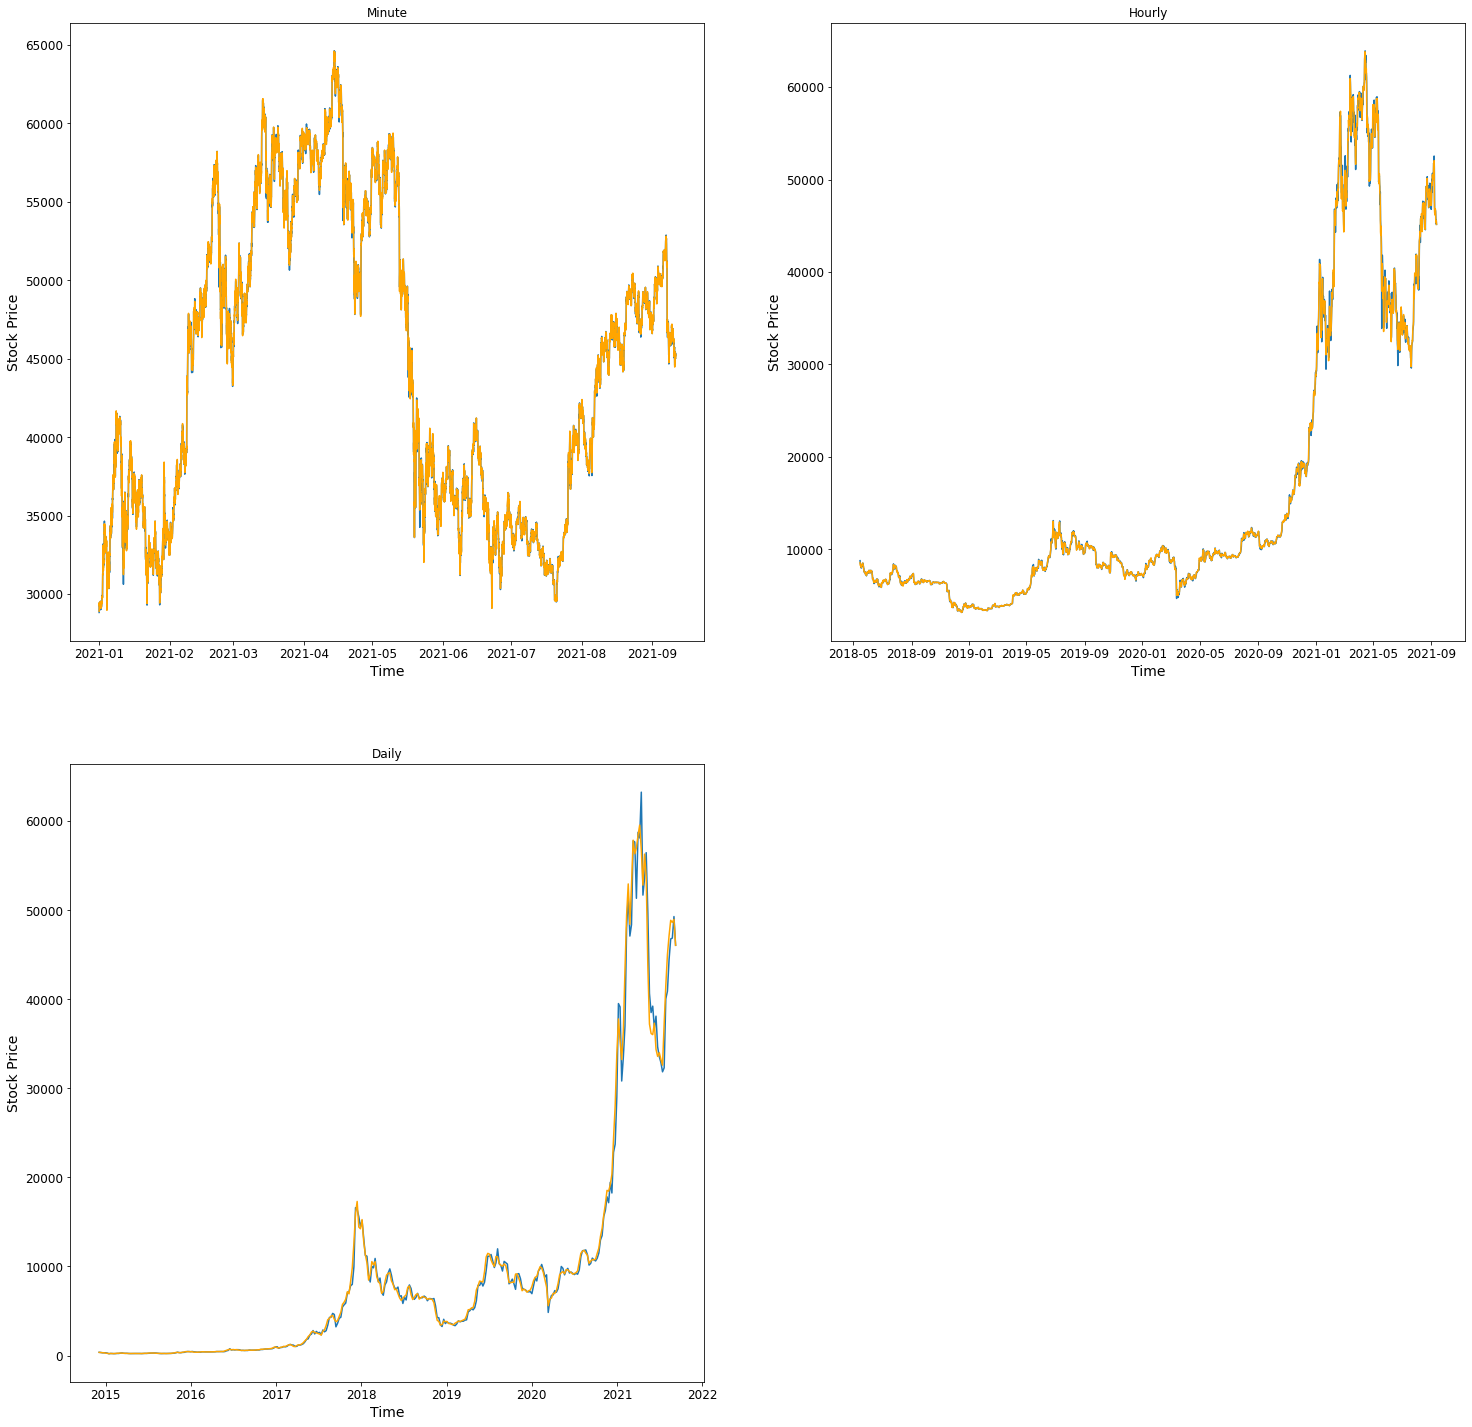

In [103]:
plot_daily_data_exponential(btc_minute[::30], btc_hourly[::12], btc_daily[::7], df4[::30], 
                            df5[::12], df6[::7])

Creating Intervals for Derivatives and for training

In [104]:
#For regular data

btc_minute = btc_minute[::30]
btc_hourly = btc_hourly[::12]
btc_daily = btc_daily[::7]

#For exponential data

btc_minute_exponential = btc_minute_data[::30]
btc_hourly_exponential = btc_hourly_data[::12]
btc_daily_exponential = btc_daily_data[::7]

In [105]:
btc_minute_exponential

,date,open,close,Volume USD
0,2021-09-11 07:20:00,45033.760000,45033.760000,23.339647
30,2021-09-11 06:50:00,45292.869670,45296.664051,8201.874268
60,2021-09-11 06:20:00,45325.412175,45316.414509,990.909393
90,2021-09-11 05:50:00,45292.390364,45293.855308,4175.580107
120,2021-09-11 05:20:00,45127.877841,45119.967997,5861.690999
...,...,...,...,...
364620,2021-01-01 02:20:00,29385.459792,29379.571333,191779.310800
364650,2021-01-01 01:50:00,29446.793471,29450.926489,341965.091800
364680,2021-01-01 01:20:00,29380.765580,29381.456074,289237.003800
364710,2021-01-01 00:50:00,29046.589060,29048.677176,158634.063100


Creating Derivatives

In [106]:
#For Regular Data

btc_minute["Derivative"] = (btc_minute["close"] - btc_minute["open"])/(30-0)
btc_hourly["Derivative"] = (btc_hourly["close"] - btc_hourly["open"])/(12-0)
btc_daily["Derivative"] = (btc_daily["close"] - btc_daily["open"])/(7-0)

#For Smoothed Data

btc_minute_exponential["Derivative"] = (btc_minute_exponential["close"] - btc_minute_exponential["open"])/(30-0)
btc_hourly_exponential["Derivative"] = (btc_hourly_exponential["close"] - btc_hourly_exponential["open"])/(12-0)
btc_daily_exponential["Derivative"] = (btc_daily_exponential["close"] - btc_daily_exponential["open"])/(7-0)

In [107]:
def classify(derivative):
    if derivative > 0:
        return 1
    else:
        return 0

In [108]:
#For Regular Data

btc_minute["Target"] = list(map(classify, btc_minute["Derivative"]))
btc_hourly["Target"] = list(map(classify, btc_hourly["Derivative"]))
btc_daily["Target"] = list(map(classify, btc_daily["Derivative"]))

#For Smoothed Data

btc_minute_exponential["Target"] = list(map(classify, btc_minute_exponential["Derivative"]))
btc_hourly_exponential["Target"] = list(map(classify, btc_hourly_exponential["Derivative"]))
btc_daily_exponential["Target"] = list(map(classify, btc_daily_exponential["Derivative"]))

### Setting up Trianing and Tests sets

Sorting index from Data, 20% for test and the rest for training

In [109]:
times_minute = sorted(btc_minute.index.values)
btc_minute_last20pct = times_minute[int(.20*len(times_minute))]

times_hourly = sorted(btc_hourly.index.values)
btc_hourly_last20pct = times_hourly[int(.20*len(times_hourly))]

times_daily = sorted(btc_daily.index.values)
btc_daily_last20pct = times_daily[int(.20*len(times_daily))]

In [110]:
#For Regular Data

validation_btc_minute_data = btc_minute_exponential[(btc_minute.index < btc_minute_last20pct)]
validation_btc_hourly_data = btc_hourly_exponential[(btc_hourly.index < btc_hourly_last20pct)]
validation_btc_daily_data = btc_daily_exponential[(btc_daily.index < btc_daily_last20pct)]

In [111]:
#For Smoothed Data

btc_minute_exponential = btc_minute_exponential[(btc_minute.index >= btc_minute_last20pct)]
btc_hourly_exponential = btc_hourly_exponential[(btc_hourly.index >= btc_hourly_last20pct)]
btc_daily_exponential = btc_daily_exponential[(btc_daily.index >= btc_daily_last20pct)]

In [112]:
validation_btc_minute_data.shape

(2431, 6)

In [113]:
btc_minute_exponential.shape

(9728, 6)

Splitting up the training and test sets

In [114]:
#Splitting up minute dataset

X_train_minute = btc_minute_exponential[["open", "close", "Volume USD", "Derivative"]]
y_train_minute = btc_minute_exponential[["Target"]]
X_test_minute = validation_btc_minute_data[["open", "close", "Volume USD", "Derivative"]]
y_test_minute = validation_btc_minute_data[["Target"]]

#Splitting up hourly dataset

X_train_hourly = btc_hourly_exponential[["open", "close", "Volume USD", "Derivative"]]
y_train_hourly = btc_hourly_exponential[["Target"]]
X_test_hourly = validation_btc_hourly_data[["open", "close", "Volume USD", "Derivative"]]
y_test_hourly = validation_btc_hourly_data[["Target"]]

#Splitting up daily dataset

X_train_daily = btc_daily_exponential[["open", "close", "Volume USD", "Derivative"]]
y_train_daily = btc_daily_exponential[["Target"]]
X_test_daily = validation_btc_daily_data[["open", "close", "Volume USD", "Derivative"]]
y_test_daily = validation_btc_daily_data[["Target"]]

Scaling Data

In [115]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#Minute data

X_train_minute = scaler.fit_transform(X_train_minute)
y_train_minute = scaler.fit_transform(y_train_minute)
X_test_minute = scaler.fit_transform(X_test_minute)
y_test_minute = scaler.fit_transform(y_test_minute)

#Hourly Data

X_train_hourly = scaler.fit_transform(X_train_hourly)
y_train_hourly = scaler.fit_transform(y_train_hourly)
X_test_hourly = scaler.fit_transform(X_test_hourly)
y_test_hourly = scaler.fit_transform(y_test_hourly)

#Daily Data

X_train_daily = scaler.fit_transform(X_train_daily)
y_train_daily = scaler.fit_transform(y_train_daily)
X_test_daily = scaler.fit_transform(X_test_daily)
y_test_daily = scaler.fit_transform(y_test_daily)

### Training Models

#### Decision Tree

In [116]:
#Minute Data

tree_clf_minute = DecisionTreeClassifier(max_depth = 8, random_state = 42)
tree_clf_minute.fit(X_train_minute, y_train_minute)

#Hourly Data

tree_clf_hourly = DecisionTreeClassifier(max_depth = 8, random_state = 42)
tree_clf_hourly.fit(X_train_hourly, y_train_hourly)

#Daily Data

tree_clf_daily = DecisionTreeClassifier(max_depth = 8, random_state = 42)
tree_clf_daily.fit(X_train_daily, y_train_daily)

DecisionTreeClassifier(max_depth=8, random_state=42)

Daily Data Cross Validation

In [117]:
# -----
# Coarse-Grained DecisionTreeRegressor GridSearch
# -----

param_grid=[{'min_samples_split':[2,10,50], 'max_depth': [2,10,15]}]

grid_search = GridSearchCV(tree_clf_daily, param_grid, cv=5)

grid_search.fit(X_train_daily, y_train_daily)
grid_search.best_params_

{'max_depth': 2, 'min_samples_split': 2}

In [118]:
# -----
# Final-Grained DecisionTreeRegressor GridSearch
# -----

param_grid=[{'min_samples_split': list(range(1,5)), 'max_depth': list(range(1,5))}]

grid_search = GridSearchCV(tree_clf_daily, param_grid, cv=5)

grid_search.fit(X_train_daily, y_train_daily)
grid_search.best_params_

{'max_depth': 1, 'min_samples_split': 2}

In [119]:
tree_clf_daily = DecisionTreeClassifier(max_depth = 1, min_samples_split=2, random_state = 42)
tree_clf_daily.fit(X_train_daily, y_train_daily)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [120]:
tree_preds = tree_clf_daily.predict(X_test_daily)
acc_score = accuracy_score(y_test_daily, tree_preds)
pres_score = precision_score(y_test_daily, tree_preds)
rec_score = recall_score(y_test_daily, tree_preds)

print('Accuracy=%s' % (acc_score))
print('Precision=%s' % (pres_score))
print('Recall=%s' % (rec_score))

Accuracy=0.7857142857142857
Precision=0.7580645161290323
Recall=1.0


Hourly Data Cross Validation

In [121]:
# -----
# Coarse-Grained DecisionTreeRegressor GridSearch
# -----

param_grid=[{'min_samples_split':[2,10,50], 'max_depth': [2,10,15]}]

grid_search = GridSearchCV(tree_clf_hourly, param_grid, cv=5)

grid_search.fit(X_train_hourly, y_train_hourly)
grid_search.best_params_

{'max_depth': 2, 'min_samples_split': 2}

In [122]:
# -----
# Final-Grained DecisionTreeRegressor GridSearch
# -----

param_grid=[{'min_samples_split': list(range(1,5)), 'max_depth': list(range(1,5))}]

grid_search = GridSearchCV(tree_clf_hourly, param_grid, cv=5)

grid_search.fit(X_train_hourly, y_train_hourly)
grid_search.best_params_

{'max_depth': 1, 'min_samples_split': 2}

In [123]:
tree_clf_hourly = DecisionTreeClassifier(max_depth = 1, min_samples_split=2, random_state = 42)
tree_clf_hourly.fit(X_train_hourly, y_train_hourly)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [124]:
tree_preds = tree_clf_hourly.predict(X_test_hourly)
acc_score = accuracy_score(y_test_hourly, tree_preds)
pres_score = precision_score(y_test_hourly, tree_preds)
rec_score = recall_score(y_test_hourly, tree_preds)

print('Accuracy=%s' % (acc_score))
print('Precision=%s' % (pres_score))
print('Recall=%s' % (rec_score))

Accuracy=0.6234567901234568
Precision=1.0
Recall=0.22127659574468084


Minute Data Cross Validation

In [125]:
# -----
# Coarse-Grained DecisionTreeRegressor GridSearch
# -----

param_grid=[{'min_samples_split':[2,10,50], 'max_depth': [35,50,65]}]

grid_search = GridSearchCV(tree_clf_minute, param_grid, cv=5)

grid_search.fit(X_train_minute, y_train_minute)
grid_search.best_params_

{'max_depth': 35, 'min_samples_split': 2}

In [126]:
# -----
# Final-Grained DecisionTreeRegressor GridSearch
# -----

param_grid=[{'min_samples_split': list(range(1,5)), 'max_depth': [25,35,40]}]

grid_search = GridSearchCV(tree_clf_minute, param_grid, cv=5)

grid_search.fit(X_train_minute, y_train_minute)
grid_search.best_params_

{'max_depth': 25, 'min_samples_split': 2}

In [127]:
tree_clf_minute = DecisionTreeClassifier(max_depth = 25, min_samples_split=2, random_state = 42)
tree_clf_minute.fit(X_train_minute, y_train_minute)

DecisionTreeClassifier(max_depth=25, random_state=42)

In [128]:
tree_preds = tree_clf_minute.predict(X_test_minute)
acc_score = accuracy_score(y_test_minute, tree_preds)
pres_score = precision_score(y_test_minute, tree_preds)
rec_score = recall_score(y_test_minute, tree_preds)

print('Accuracy=%s' % (acc_score))
print('Precision=%s' % (pres_score))
print('Recall=%s' % (rec_score))

Accuracy=0.6668037844508433
Precision=1.0
Recall=0.34624697336561744


#### Gradient Boosting

In [129]:
#Minute

grbt_minute = GradientBoostingClassifier(learning_rate=.1, max_depth=2, random_state=42)
grbt_minute.fit(X_train_minute, np.ravel(y_train_minute))

#Hourly

grbt_hourly = GradientBoostingClassifier(learning_rate=.1, max_depth=2, random_state=42)
grbt_hourly.fit(X_train_hourly, np.ravel(y_train_hourly))

#Daily

grbt_daily = GradientBoostingClassifier(learning_rate=.1, max_depth=2, random_state=42)
grbt_daily.fit(X_train_daily, np.ravel(y_train_daily))

GradientBoostingClassifier(max_depth=2, random_state=42)

Daily Data Cross Validation

In [130]:
# -----
# Refined GradientBoostingRegressor GridSearch
# -----

param_grid=[{'n_estimators':[10,20,30,40,50,60,70,80,90], 'learning_rate':[.1, .5, 1.0 , 1.5, 2.0], 'max_depth': [1,2,3]}]

grid_search = GridSearchCV(grbt_daily, param_grid, cv=5)

grid_search.fit(X_train_daily, np.ravel(y_train_daily))
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 10}

In [131]:
# -----
# Final GradientBoostingRegressor GridSearch
# -----

param_grid=[{'n_estimators': list(range(5,15)), 'learning_rate':[.1], 'max_depth': [1]}]

grid_search = GridSearchCV(grbt_daily, param_grid, cv=5)

grid_search.fit(X_train_daily, np.ravel(y_train_daily))
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 5}

In [132]:
grbt_daily = GradientBoostingClassifier(n_estimators=5, learning_rate=1.0, max_depth=1, random_state=42)
grbt_daily.fit(X_train_daily, np.ravel(y_train_daily))

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=5,
                           random_state=42)

In [133]:
preds = grbt_daily.predict(X_test_daily)
acc_score = accuracy_score(y_test_daily, preds)
pres_score = precision_score(y_test_daily, preds)
rec_score = recall_score(y_test_daily, preds)

print('Accuracy=%s' % (acc_score))
print('Precision=%s' % (pres_score))
print('Recall=%s' % (rec_score))

Accuracy=0.7857142857142857
Precision=0.7580645161290323
Recall=1.0


Hourly Cross Validation

In [134]:
# -----
# Refined GradientBoostingRegressor GridSearch
# -----

param_grid=[{'n_estimators':[10,30,50,70,90], 'learning_rate':[.1, 1.0, 2.0], 'max_depth': [1,2,3]}]

grid_search = GridSearchCV(grbt_hourly, param_grid, cv=5)

grid_search.fit(X_train_hourly, np.ravel(y_train_hourly))
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 10}

In [135]:
# -----
# Final GradientBoostingRegressor GridSearch
# -----

param_grid=[{'n_estimators': [8,9,10,11,12], 'learning_rate':[.1], 'max_depth': [1]}]

grid_search = GridSearchCV(grbt_hourly, param_grid, cv=5)

grid_search.fit(X_train_hourly, np.ravel(y_train_hourly))
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 8}

In [136]:
grbt_hourly = GradientBoostingClassifier(n_estimators=8, learning_rate=.1, max_depth=1, random_state=42)
grbt_hourly.fit(X_train_hourly, np.ravel(y_train_hourly))

GradientBoostingClassifier(max_depth=1, n_estimators=8, random_state=42)

In [137]:
preds = grbt_hourly.predict(X_test_hourly)
acc_score = accuracy_score(y_test_hourly, preds)
pres_score = precision_score(y_test_hourly, preds)
rec_score = recall_score(y_test_hourly, preds)

print('Accuracy=%s' % (acc_score))
print('Precision=%s' % (pres_score))
print('Recall=%s' % (rec_score))

Accuracy=0.6234567901234568
Precision=1.0
Recall=0.22127659574468084


Minute Data Cross Validation

In [138]:
# -----
# Refined GradientBoostingRegressor GridSearch
# -----

param_grid=[{'n_estimators':[10,30,50,70,90], 'learning_rate':[.1, 1.0, 2.0], 'max_depth': [1,2,3]}]

grid_search = GridSearchCV(grbt_minute, param_grid, cv=5)

grid_search.fit(X_train_minute, np.ravel(y_train_minute))
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 10}

In [139]:
# -----
# Final GradientBoostingRegressor GridSearch
# -----

param_grid=[{'n_estimators':[8,9,10,11,12], 'learning_rate':[.1], 'max_depth': [1]}]

grid_search = GridSearchCV(grbt_minute, param_grid, cv=5)

grid_search.fit(X_train_minute, np.ravel(y_train_minute))
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 8}

In [140]:
grbt_minute = GradientBoostingClassifier(n_estimators=8, learning_rate=.1, max_depth=1, random_state=42)
grbt_minute.fit(X_train_minute, np.ravel(y_train_minute))

GradientBoostingClassifier(max_depth=1, n_estimators=8, random_state=42)

In [141]:
preds = grbt_minute.predict(X_test_minute)
acc_score = accuracy_score(y_test_minute, tree_preds)
pres_score = precision_score(y_test_minute, tree_preds)
rec_score = recall_score(y_test_minute, tree_preds)

print('Accuracy=%s' % (acc_score))
print('Precision=%s' % (pres_score))
print('Recall=%s' % (rec_score))

Accuracy=0.6668037844508433
Precision=1.0
Recall=0.34624697336561744


#### Random Forest

In [142]:
#Minute

rnd_clf_minute = RandomForestClassifier(n_estimators=250, max_depth=5, min_samples_split=14, random_state=42)
rnd_clf_minute.fit(X_train_minute, np.ravel(y_train_minute))

#Hourly

rnd_clf_hourly = RandomForestClassifier(n_estimators=250, max_depth=5, min_samples_split=14, random_state=42)
rnd_clf_hourly.fit(X_train_hourly, np.ravel(y_train_hourly))

#Daily

rnd_clf_daily = RandomForestClassifier(n_estimators=250, max_depth=5, min_samples_split=14, random_state=42)
rnd_clf_daily.fit(X_train_daily, np.ravel(y_train_daily))

RandomForestClassifier(max_depth=5, min_samples_split=14, n_estimators=250,
                       random_state=42)

Daily Data Cross Validation

In [143]:
# -----
# Coarse-Grained RandomForestRegressor GridSearch
# -----

param_grid=[{'n_estimators':[1,10,50,100,250,500,1000], 'min_samples_split':[2,10,50], 'max_depth': [1,10,100]}]

grid_search = GridSearchCV(rnd_clf_daily, param_grid, cv=5)

grid_search.fit(X_train_daily, np.ravel(y_train_daily))
grid_search.best_params_

{'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 1}

In [144]:
# -----
# Final-Grained RandomForestRegressor GridSearch
# -----

param_grid=[{'n_estimators': list(range(1,5)), 'min_samples_split':[2], 'max_depth': [1]}]

grid_search = GridSearchCV(rnd_clf_daily, param_grid, cv=5)

grid_search.fit(X_train_daily, np.ravel(y_train_daily))
grid_search.best_params_

{'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 1}

In [145]:
rnd_clf_daily = RandomForestClassifier(n_estimators=1, max_depth=1, min_samples_split=2, random_state=42)
rnd_clf_daily.fit(X_train_daily, np.ravel(y_train_daily))

RandomForestClassifier(max_depth=1, n_estimators=1, random_state=42)

In [146]:
preds = rnd_clf_daily.predict(X_test_daily)
acc_score = accuracy_score(y_test_daily, preds)
pres_score = precision_score(y_test_daily, preds)
rec_score = recall_score(y_test_daily, preds)

print('Accuracy=%s' % (acc_score))
print('Precision=%s' % (pres_score))
print('Recall=%s' % (rec_score))

Accuracy=0.7857142857142857
Precision=0.7580645161290323
Recall=1.0


Hourly Data Cross Validation

In [147]:
# -----
# Coarse-Grained RandomForestRegressor GridSearch
# -----

param_grid=[{'n_estimators':[1,10,50,100], 'min_samples_split':[2,10], 'max_depth': [1,10,50]}]

grid_search = GridSearchCV(rnd_clf_hourly, param_grid, cv=5)

grid_search.fit(X_train_hourly, np.ravel(y_train_hourly))
grid_search.best_params_

{'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 1}

In [148]:
# -----
# Final-Grained RandomForestRegressor GridSearch
# -----

param_grid=[{'n_estimators': list(range(1,5)), 'min_samples_split':[2], 'max_depth': [1]}]

grid_search = GridSearchCV(rnd_clf_hourly, param_grid, cv=5)

grid_search.fit(X_train_hourly, np.ravel(y_train_hourly))
grid_search.best_params_

{'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 1}

In [149]:
rnd_clf_hourly = RandomForestClassifier(n_estimators=8, max_depth=1, min_samples_split=2, random_state=42)
rnd_clf_hourly.fit(X_train_hourly, np.ravel(y_train_hourly))

RandomForestClassifier(max_depth=1, n_estimators=8, random_state=42)

In [150]:
preds = rnd_clf_hourly.predict(X_test_hourly)
acc_score = accuracy_score(y_test_hourly, preds)
pres_score = precision_score(y_test_hourly, preds)
rec_score = recall_score(y_test_hourly, preds)

print('Accuracy=%s' % (acc_score))
print('Precision=%s' %(pres_score))
print('Recall=%s' % (rec_score))

Accuracy=0.6234567901234568
Precision=1.0
Recall=0.22127659574468084


Minute Dataset

In [151]:
# -----
# Coarse-Grained RandomForestRegressor GridSearch
# -----

param_grid=[{'n_estimators':[1,10,50,100], 'min_samples_split':[2,10], 'max_depth': [1,10,50]}]

grid_search = GridSearchCV(rnd_clf_minute, param_grid, cv=5)

grid_search.fit(X_train_minute, np.ravel(y_train_minute))
grid_search.best_params_

{'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 50}

In [152]:
# -----
# Final-Grained RandomForestRegressor GridSearch
# -----

param_grid=[{'n_estimators': [40,45,50,55,60], 'min_samples_split':[2], 'max_depth': [1]}]

grid_search = GridSearchCV(rnd_clf_minute, param_grid, cv=5)

grid_search.fit(X_train_minute, np.ravel(y_train_minute))
grid_search.best_params_

{'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 40}

In [153]:
rnd_clf_minute = RandomForestClassifier(n_estimators=40, max_depth=1, min_samples_split=2, random_state=42)
rnd_clf_minute.fit(X_train_minute, np.ravel(y_train_minute))

RandomForestClassifier(max_depth=1, n_estimators=40, random_state=42)

In [154]:
preds = rnd_clf_minute.predict(X_test_minute)
acc_score = accuracy_score(y_test_minute, preds)
pres_score = precision_score(y_test_minute, preds)
rec_score = recall_score(y_test_minute, preds)

print('Accuracy=%s' % (acc_score))
print('Precision=%s' %(pres_score))
print('Recall=%s' % (rec_score))

Accuracy=0.6668037844508433
Precision=1.0
Recall=0.34624697336561744


#### Artificial Neural Network

Daily Dataset

In [155]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train_daily.shape[1:]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train_daily, y_train_daily, epochs=100, validation_data=(X_test_daily, y_test_daily))

Epoch 1/100
9/9 [==============================] - 0s 12ms/step - loss: 0.6921 - accuracy: 0.5528 - val_loss: 0.6893 - val_accuracy: 0.6143
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5669 - val_loss: 0.6862 - val_accuracy: 0.6571
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5669 - val_loss: 0.6834 - val_accuracy: 0.6857
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5669 - val_loss: 0.6807 - val_accuracy: 0.6714
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5739 - val_loss: 0.6783 - val_accuracy: 0.6714
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5739 - val_loss: 0.6761 - val_accuracy: 0.6714
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5739 - val_loss: 0.6741 - val_accuracy: 0.6714
Epoch 8/100
9/9 [=========

Saving figure keras_learning_curves_plot


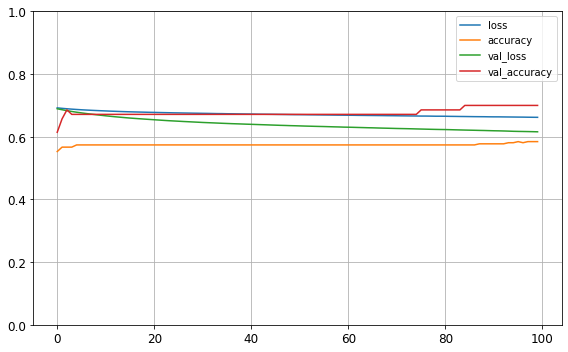

In [156]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [157]:
model.evaluate(X_test_daily, y_test_daily)

3/3 [==============================] - 0s 990us/step - loss: 0.6158 - accuracy: 0.7000


[0.6158275008201599, 0.699999988079071]

Hourly Dataset

In [158]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train_hourly.shape[1:]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train_hourly, y_train_hourly, epochs=100, validation_data=(X_test_hourly, y_test_hourly))

Epoch 1/100
61/61 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5046 - val_loss: 0.6910 - val_accuracy: 0.4835
Epoch 2/100
61/61 [==============================] - 0s 888us/step - loss: 0.6921 - accuracy: 0.5046 - val_loss: 0.6906 - val_accuracy: 0.4835
Epoch 3/100
61/61 [==============================] - 0s 965us/step - loss: 0.6919 - accuracy: 0.5046 - val_loss: 0.6902 - val_accuracy: 0.4856
Epoch 4/100
61/61 [==============================] - 0s 804us/step - loss: 0.6918 - accuracy: 0.5046 - val_loss: 0.6898 - val_accuracy: 0.4877
Epoch 5/100
61/61 [==============================] - 0s 883us/step - loss: 0.6917 - accuracy: 0.5046 - val_loss: 0.6894 - val_accuracy: 0.4897
Epoch 6/100
61/61 [==============================] - 0s 817us/step - loss: 0.6916 - accuracy: 0.5046 - val_loss: 0.6890 - val_accuracy: 0.4918
Epoch 7/100
61/61 [==============================] - 0s 899us/step - loss: 0.6914 - accuracy: 0.5046 - val_loss: 0.6885 - val_accuracy: 0.5021
E

Epoch 58/100
61/61 [==============================] - 0s 834us/step - loss: 0.6819 - accuracy: 0.6701 - val_loss: 0.6608 - val_accuracy: 0.7840
Epoch 59/100
61/61 [==============================] - 0s 817us/step - loss: 0.6816 - accuracy: 0.6675 - val_loss: 0.6599 - val_accuracy: 0.7963
Epoch 60/100
61/61 [==============================] - 0s 835us/step - loss: 0.6813 - accuracy: 0.6562 - val_loss: 0.6590 - val_accuracy: 0.8066
Epoch 61/100
61/61 [==============================] - 0s 817us/step - loss: 0.6811 - accuracy: 0.5879 - val_loss: 0.6583 - val_accuracy: 0.7922
Epoch 62/100
61/61 [==============================] - 0s 828us/step - loss: 0.6807 - accuracy: 0.6634 - val_loss: 0.6574 - val_accuracy: 0.7963
Epoch 63/100
61/61 [==============================] - 0s 867us/step - loss: 0.6805 - accuracy: 0.6542 - val_loss: 0.6565 - val_accuracy: 0.7942
Epoch 64/100
61/61 [==============================] - 0s 883us/step - loss: 0.6802 - accuracy: 0.6177 - val_loss: 0.6558 - val_accuracy:

Saving figure keras_learning_curves_plot


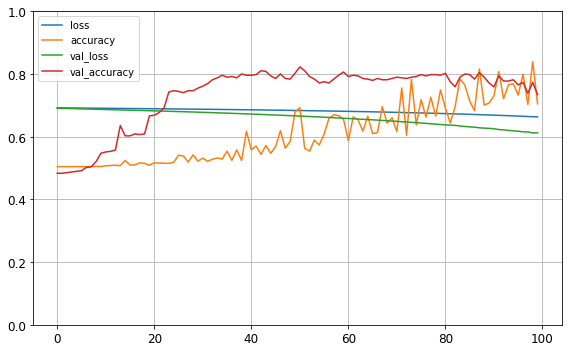

In [159]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [160]:
model.evaluate(X_test_hourly, y_test_hourly)

16/16 [==============================] - 0s 623us/step - loss: 0.6124 - accuracy: 0.7346


[0.6124289631843567, 0.7345678806304932]

Minute Dataset

In [161]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train_minute.shape[1:]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train_minute, y_train_minute, epochs=100, validation_data=(X_test_minute, y_test_minute))

Epoch 1/100
304/304 [==============================] - 0s 913us/step - loss: 0.6934 - accuracy: 0.4931 - val_loss: 0.6922 - val_accuracy: 0.5586
Epoch 2/100
304/304 [==============================] - 0s 659us/step - loss: 0.6922 - accuracy: 0.5294 - val_loss: 0.6907 - val_accuracy: 0.6302
Epoch 3/100
304/304 [==============================] - 0s 621us/step - loss: 0.6912 - accuracy: 0.5317 - val_loss: 0.6893 - val_accuracy: 0.6117
Epoch 4/100
304/304 [==============================] - 0s 673us/step - loss: 0.6903 - accuracy: 0.5502 - val_loss: 0.6878 - val_accuracy: 0.7092
Epoch 5/100
304/304 [==============================] - 0s 632us/step - loss: 0.6894 - accuracy: 0.5594 - val_loss: 0.6865 - val_accuracy: 0.6940
Epoch 6/100
304/304 [==============================] - 0s 650us/step - loss: 0.6885 - accuracy: 0.5793 - val_loss: 0.6848 - val_accuracy: 0.8050
Epoch 7/100
304/304 [==============================] - 0s 661us/step - loss: 0.6875 - accuracy: 0.5805 - val_loss: 0.6834 - val_ac

Saving figure keras_learning_curves_plot


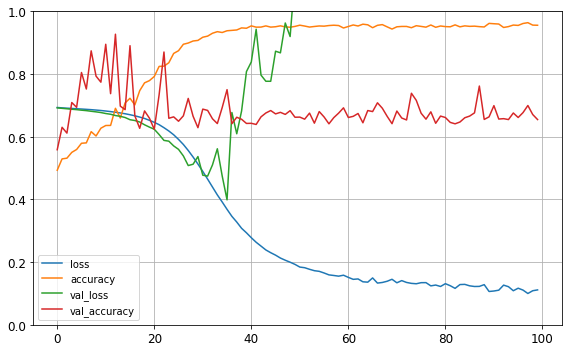

In [162]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [163]:
model.evaluate(X_test_minute, y_test_minute)

76/76 [==============================] - 0s 499us/step - loss: 2.5531 - accuracy: 0.6549


[2.5531182289123535, 0.6548745632171631]

### Summary - Review

This was a lengthy project but one that was hopefully educational to you. This notebook and the additional work that was done in Tableau took a lot of time and effort. There was a lot of automation, a lot of changing of parameters, cross validations, and a lot of dataset manipulations. Some of the models took a substantial amount of time to train, so there was a lot of waiting for some of them. Thankfully I was able to find a way to make the project less complicated. There were many notebooks that were completed and finally merged into this complete presentation. Hopefully the notes and video explained much of what I intended to manifest or show you. 

Let’s start with out analyses. Hopefully I was able to explain what a derivative is and that you understood what cryptocurrency is. Our research questions and their corresponding answers are as follow. Can we track the trend of a cryptocurrency price with sequential data? I think we saw that it depends on the dataset that we are using. We noticed that we could track the trends pretty well for the daily data set but not as well for the hourly or minute data. This was largely because the hourly and minute data were still too noisy, while the results are not that bad, they just didn’t compare to the daily data results. We cannot perform mathematical calculations on a compact dataset, the instances need to be separated by a certain amount of time as we saw. Can machine learning models and neural networks take this sequential data and predict a trend? We saw that the original data set does not really help us much in predicting trends, but that data smoothing is necessary in order for us to do and then we apply the machine learning models and neural networks. We saw that the smoothing methods used were convolution and exponential smoothing. Can mathematical derivatives help us in making better stock predictions? This type of method will only work when the data is smoothed out and we get rid of much of the noise and peaks. Derivatives are taken on a continuous and smooth curve, not on graphs with peaks because it the latter, the curve of the graph is non differentiable. At what time scales/intervals can we start applying these calculus methods for them to be effective? We see that if the data is smoothed out, we can definitely get some good results. However, when we take the daily data, our accuracy improves greatly, and we have a good model then.

We were able to see when we graphed the original datasets, how noisy and erratic it was. It seems very difficult to do any mathematical calculations, I doubt that we can because of that. The smaller the dataset the clearer the graph was. Once we set the graphs to have intervals then the data points were less, and the curves or peaks were noticeable. We are able to see that after we smooth the data, whether it was through convolution or exponential, that the curves fit the curve well and was mirroring the trends of the original data. We did loose data points, but this was necessary in order to perform our derivatives. 

After training our machine learning models, we see that the results were virtually the same. The convolution dataset produced the same results for the Decision Tree, Gradient Descent, and Random Forest. The exponential dataset produced the same results from all of those models. Comparing both of the sets we see that the convolution produced an excellent result for the daily dataset and the accuracy decreased from the hourly dataset and then decreased on the minute data. The exponential data produced some great results as well but were significantly lower compared to the convolution data. The only one that performed better from the convolution data was the minute data. Overall, I think all of the models performed well and we can tell because of our performance measure.

Next, we will review our ANN models. On both the minute data, the convolution and exponential sets, we have the accuracy improving. The accuracy of the training set and test set look good since the graph keeps improving. The loss and validation loss are both decreasing, so that is a good thing as well. Perhaps if we did more epochs, we could improve the results. We see the evaluation on the test set is at 94% on the daily data, good job! 

The hourly data is overfitting on the convolution data but on the exponential data the accuracy is converging to this is great. This is a great model 76% for the exponential data. 

The ANN model for the minute data seems the be the worst model, the evaluate() method is still good but we can see from the history that it seems to be all over the place. Perhaps stopping the epochs or altering the parameters or layers can help us.


<h1><center>Ethereum</center></h1>


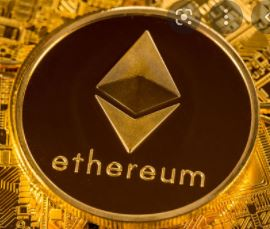

### Imporing Data

In [164]:
#Importing Minute by Minute Data

path = r"C:\Users\mnava\OneDrive\Final Project - Crypto\Data sets\Minute by Minute"
os.chdir(path)

eth_minute = pd.read_csv("Bitstamp_ETHUSD_2021_minute.csv")

#Importing Hourly Data

path = r"C:\Users\mnava\OneDrive\Final Project - Crypto\Data sets\Hourly"
os.chdir(path)

eth_hourly = pd.read_csv("Bitstamp_ETHUSD_1h.csv")

#Importing Daily Data

path = r"C:\Users\mnava\OneDrive\Final Project - Crypto\Data sets\Daily"
os.chdir(path)

eth_daily = pd.read_csv("Bitstamp_ETHUSD_daily.csv")

Converting Date Column Type - 

The Pandas feature pd.to_datetime converts the string Date time to a Python Date Time. This will help us plot the graphs in matplotlib and for model creation.

### Smoothing Data - With Convolution

In [165]:
filter_length_minute = 10
filter_length_hourly = 1000
filter_length_daily = 75

eth_close_minute = np.convolve(eth_minute["close"], np.ones((filter_length_minute)), mode="same")
eth_close_minute /= filter_length_minute
eth_open_minute = np.convolve(eth_minute["open"], np.ones((filter_length_minute)), mode="same")
eth_open_minute /= filter_length_minute

eth_open_hourly = np.convolve(eth_hourly["open"], np.ones((filter_length_hourly)), mode="same")
eth_open_hourly /= filter_length_hourly
eth_close_hourly = np.convolve(eth_hourly["close"], np.ones((filter_length_hourly)), mode="same")
eth_close_hourly /= filter_length_hourly

eth_open_daily = np.convolve(eth_daily["open"], np.ones((filter_length_daily)), mode="same")
eth_open_daily /= filter_length_daily
eth_close_daily = np.convolve(eth_daily["close"], np.ones((filter_length_daily)), mode="same")
eth_close_daily /= filter_length_daily

Converting to a Pandas Dataframe

In [166]:
minute_eth_open = pd.DataFrame(eth_open_minute, columns = ['open'])
minute_eth_close = pd.DataFrame(eth_close_minute, columns = ['close'])

hourly_eth_open = pd.DataFrame(eth_open_hourly, columns = ['open'])
hourly_eth_close = pd.DataFrame(eth_close_hourly, columns = ['close'])

daily_eth_open = pd.DataFrame(eth_open_daily, columns = ['open'])
daily_eth_close = pd.DataFrame(eth_close_daily, columns = ['close'])

eth_minute_convolution = pd.concat([eth_minute["date"], minute_eth_open, minute_eth_close, eth_minute["Volume USD"]], axis=1)
eth_hourly_convolution = pd.concat([eth_hourly["date"], hourly_eth_open, hourly_eth_close, eth_hourly["Volume USD"]], axis=1)
eth_daily_convolution = pd.concat([eth_daily["date"], daily_eth_open, daily_eth_close, eth_daily["Volume USD"]], axis=1)

Creating Intervals for Derivatives and for training

In [167]:
#Removing the instances with no data

eth_daily = eth_daily.iloc[:1401,:]
eth_daily_convolution = eth_daily_convolution.iloc[:1401,:]

In [168]:
eth_daily

,unix,date,symbol,open,high,low,close,Volume ETH,Volume USD
0,1631145600,9/9/2021 0:00,ETH/USD,3499.63,3510.80,3475.33,3486.25,1.207117e+02,4.208310e+05
1,1631059200,9/8/2021 0:00,ETH/USD,3435.74,3560.51,3216.00,3492.64,3.464505e+04,1.210027e+08
2,1630972800,9/7/2021 0:00,ETH/USD,3928.46,3949.00,3015.00,3429.61,8.600407e+04,2.949604e+08
3,1630886400,9/6/2021 0:00,ETH/USD,3952.95,3973.53,3866.62,3928.29,1.134956e+04,4.458435e+07
4,1630800000,9/5/2021 0:00,ETH/USD,3889.60,3984.34,3835.00,3951.48,1.091322e+04,4.312335e+07
...,...,...,...,...,...,...,...,...,...
1396,1510531200,11/13/2017 0:00,ETH/USD,306.10,320.69,305.91,316.14,1.151786e+07,3.661350e+04
1397,1510444800,11/12/2017 0:00,ETH/USD,315.76,318.98,300.11,306.10,1.485482e+07,4.820080e+04
1398,1510358400,11/11/2017 0:00,ETH/USD,298.66,322.19,298.00,315.76,7.328432e+06,2.383674e+04
1399,1510272000,11/10/2017 0:00,ETH/USD,321.32,325.61,291.00,298.66,1.058054e+07,3.441165e+04


In [169]:
eth_minute = eth_minute[::30]
eth_hourly = eth_hourly[::12]
eth_daily = eth_daily[::7]

eth_minute_convolution = eth_minute_convolution[::30]
eth_hourly_convolution = eth_hourly_convolution[::12]
eth_daily_convolution = eth_daily_convolution[::7]

Creating Derivatives

In [170]:
#For Regular Data

eth_minute["Derivative"] = (eth_minute["close"] - eth_minute["open"])/(30-0)
eth_hourly["Derivative"] = (eth_hourly["close"] - eth_hourly["open"])/(12-0)
eth_daily["Derivative"] = (eth_daily["close"] - eth_daily["open"])/(7-0)

#For Smoothed Data

eth_minute_convolution["Derivative"] = (eth_minute_convolution["close"] - eth_minute_convolution["open"])/(30-0)
eth_hourly_convolution["Derivative"] = (eth_hourly_convolution["close"] - eth_hourly_convolution["open"])/(12-0)
eth_daily_convolution["Derivative"] = (eth_daily_convolution["close"] - eth_daily_convolution["open"])/(7-0)

Creating Targets

In [171]:
def classify(derivative):
    if derivative > 0:
        return 1
    else:
        return 0

In [172]:
#For Regular Data

eth_minute["Target"] = list(map(classify, eth_minute["Derivative"]))
eth_hourly["Target"] = list(map(classify, eth_hourly["Derivative"]))
eth_daily["Target"] = list(map(classify, eth_daily["Derivative"]))

#For Smoothed Data

eth_minute_convolution["Target"] = list(map(classify, eth_minute_convolution["Derivative"]))
eth_hourly_convolution["Target"] = list(map(classify, eth_hourly_convolution["Derivative"]))
eth_daily_convolution["Target"] = list(map(classify, eth_daily_convolution["Derivative"]))

### Setting up Trianing and Tests sets

Sorting index from Data, 20% for test and the rest for training

In [173]:
times_minute = sorted(eth_minute.index.values)
eth_minute_last20pct = times_minute[int(.20*len(times_minute))]

times_hourly = sorted(eth_hourly.index.values)
eth_hourly_last20pct = times_hourly[int(.20*len(times_hourly))]

times_daily = sorted(eth_daily.index.values)
eth_daily_last20pct = times_daily[int(.20*len(times_daily))]

In [174]:
#For Regular Data

validation_eth_minute_data = eth_minute_convolution[(eth_minute.index < eth_minute_last20pct)]
validation_eth_hourly_data = eth_hourly_convolution[(eth_hourly.index < eth_hourly_last20pct)]
validation_eth_daily_data = eth_daily_convolution[(eth_daily.index < eth_daily_last20pct)]

In [175]:
#For Smoothed Data

eth_minute_convolution = eth_minute_convolution[(eth_minute.index >= eth_minute_last20pct)]
eth_hourly_convolution = eth_hourly_convolution[(eth_hourly.index >= eth_hourly_last20pct)]
eth_daily_convolution = eth_daily_convolution[(eth_daily.index >= eth_daily_last20pct)]

In [176]:
eth_daily_convolution

,date,open,close,Volume USD,Derivative,Target
280,12/3/2020 0:00,594.243467,605.826800,58071240.45,1.654762,1
287,11/26/2020 0:00,530.450133,535.613333,98552934.31,0.737600,1
294,11/19/2020 0:00,498.841333,502.124133,26118305.11,0.468971,1
301,11/12/2020 0:00,473.925333,477.948000,17308200.51,0.574667,1
308,11/5/2020 0:00,449.876133,452.739333,21797455.64,0.409029,1
...,...,...,...,...,...,...
1372,12/7/2017 0:00,541.723867,555.896667,48889.80,2.024686,1
1379,11/30/2017 0:00,432.739067,441.838400,59144.71,1.299905,1
1386,11/23/2017 0:00,354.076133,359.098000,77408.69,0.717410,1
1393,11/16/2017 0:00,286.734933,291.775467,34360.48,0.720076,1


In [177]:
validation_eth_daily_data

,date,open,close,Volume USD,Derivative,Target
0,9/9/2021 0:00,1650.223867,1661.602800,4.208310e+05,1.625562,1
7,9/2/2021 0:00,1873.762933,1890.167333,6.610661e+07,2.343486,1
14,8/26/2021 0:00,2062.207333,2084.022000,1.134717e+08,3.116381,1
21,8/19/2021 0:00,2242.916800,2261.800800,9.513608e+07,2.697714,1
28,8/12/2021 0:00,2447.506133,2464.214800,1.888063e+08,2.386952,1
35,8/5/2021 0:00,2652.023200,2670.252933,1.692887e+08,2.604248,1
42,7/29/2021 0:00,2580.582133,2607.032133,3.860246e+07,3.778571,1
49,7/22/2021 0:00,2471.499467,2480.049733,6.589319e+07,1.221467,1
56,7/15/2021 0:00,2402.993600,2411.069067,4.338881e+07,1.153638,1
63,7/8/2021 0:00,2359.091867,2366.289333,1.137756e+08,1.028210,1


Splitting up the training and test sets

In [178]:
#Splitting up minute dataset

X_train_minute = eth_minute_convolution[["open", "close", "Volume USD", "Derivative"]]
y_train_minute = eth_minute_convolution[["Target"]]
X_test_minute = validation_eth_minute_data[["open", "close", "Volume USD", "Derivative"]]
y_test_minute = validation_eth_minute_data[["Target"]]

#Splitting up hourly dataset

X_train_hourly = eth_hourly_convolution[["open", "close", "Volume USD", "Derivative"]]
y_train_hourly = eth_hourly_convolution[["Target"]]
X_test_hourly = validation_eth_hourly_data[["open", "close", "Volume USD", "Derivative"]]
y_test_hourly = validation_eth_hourly_data[["Target"]]

#Splitting up daily dataset

X_train_daily = eth_daily_convolution[["open", "close", "Volume USD", "Derivative"]]
y_train_daily = eth_daily_convolution[["Target"]]
X_test_daily = validation_eth_daily_data[["open", "close", "Volume USD", "Derivative"]]
y_test_daily = validation_eth_daily_data[["Target"]]

In [179]:
X_train_daily

,open,close,Volume USD,Derivative
280,594.243467,605.826800,58071240.45,1.654762
287,530.450133,535.613333,98552934.31,0.737600
294,498.841333,502.124133,26118305.11,0.468971
301,473.925333,477.948000,17308200.51,0.574667
308,449.876133,452.739333,21797455.64,0.409029
...,...,...,...,...
1372,541.723867,555.896667,48889.80,2.024686
1379,432.739067,441.838400,59144.71,1.299905
1386,354.076133,359.098000,77408.69,0.717410
1393,286.734933,291.775467,34360.48,0.720076


Scaling Data

In [180]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#Minute data

X_train_minute = scaler.fit_transform(X_train_minute)
y_train_minute = scaler.fit_transform(y_train_minute)
X_test_minute = scaler.fit_transform(X_test_minute)
y_test_minute = scaler.fit_transform(y_test_minute)

#Hourly Data

X_train_hourly = scaler.fit_transform(X_train_hourly)
y_train_hourly = scaler.fit_transform(y_train_hourly)
X_test_hourly = scaler.fit_transform(X_test_hourly)
y_test_hourly = scaler.fit_transform(y_test_hourly)

#Daily Data

X_train_daily = scaler.fit_transform(X_train_daily)
y_train_daily = scaler.fit_transform(y_train_daily)
X_test_daily = scaler.fit_transform(X_test_daily)
y_test_daily = scaler.fit_transform(y_test_daily)

### Training Models

#### Decision Tree

In [181]:
#Minute Data

tree_clf_minute = DecisionTreeClassifier(max_depth = 8, random_state = 42)
tree_clf_minute.fit(X_train_minute, y_train_minute)

#Hourly Data

tree_clf_hourly = DecisionTreeClassifier(max_depth = 8, random_state = 42)
tree_clf_hourly.fit(X_train_hourly, y_train_hourly)

#Daily Data

tree_clf_daily = DecisionTreeClassifier(max_depth = 8, random_state = 42)
tree_clf_daily.fit(X_train_daily, y_train_daily)

DecisionTreeClassifier(max_depth=8, random_state=42)

Daily Data Cross Validation

In [182]:
# -----
# Coarse-Grained DecisionTreeRegressor GridSearch
# -----

param_grid=[{'min_samples_split':[2,10,50], 'max_depth': [2,10,15]}]

grid_search = GridSearchCV(tree_clf_daily, param_grid, cv=5)

grid_search.fit(X_train_daily, y_train_daily)
grid_search.best_params_

{'max_depth': 2, 'min_samples_split': 2}

In [183]:
# -----
# Final-Grained DecisionTreeRegressor GridSearch
# -----

param_grid=[{'min_samples_split': list(range(1,5)), 'max_depth': list(range(1,5))}]

grid_search = GridSearchCV(tree_clf_daily, param_grid, cv=5)

grid_search.fit(X_train_daily, y_train_daily)
grid_search.best_params_

{'max_depth': 1, 'min_samples_split': 2}

In [184]:
tree_clf_daily = DecisionTreeClassifier(max_depth = 1, min_samples_split=2, random_state = 42)
tree_clf_daily.fit(X_train_daily, y_train_daily)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [185]:
tree_preds = tree_clf_daily.predict(X_test_daily)
acc_score = accuracy_score(y_test_daily, tree_preds)
pres_score = precision_score(y_test_daily, tree_preds)
rec_score = recall_score(y_test_daily, tree_preds)

print('Accuracy=%s' % (acc_score))
print('Precision=%s' % (pres_score))
print('Recall=%s' % (rec_score))

Accuracy=1.0
Precision=1.0
Recall=1.0


Hourly Data Cross Validation

In [186]:
# -----
# Coarse-Grained DecisionTreeRegressor GridSearch
# -----

param_grid=[{'min_samples_split':[2,10,50], 'max_depth': [2,10,15]}]

grid_search = GridSearchCV(tree_clf_hourly, param_grid, cv=5)

grid_search.fit(X_train_hourly, y_train_hourly)
grid_search.best_params_

{'max_depth': 2, 'min_samples_split': 2}

In [187]:
# -----
# Final-Grained DecisionTreeRegressor GridSearch
# -----

param_grid=[{'min_samples_split': list(range(1,5)), 'max_depth': list(range(1,5))}]

grid_search = GridSearchCV(tree_clf_hourly, param_grid, cv=5)

grid_search.fit(X_train_hourly, y_train_hourly)
grid_search.best_params_

{'max_depth': 1, 'min_samples_split': 2}

In [188]:
tree_clf_hourly = DecisionTreeClassifier(max_depth = 1, min_samples_split=2, random_state = 42)
tree_clf_hourly.fit(X_train_hourly, y_train_hourly)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [189]:
tree_preds = tree_clf_hourly.predict(X_test_hourly)
acc_score = accuracy_score(y_test_hourly, tree_preds)
pres_score = precision_score(y_test_hourly, tree_preds)
rec_score = recall_score(y_test_hourly, tree_preds)

print('Accuracy=%s' % (acc_score))
print('Precision=%s' % (pres_score))
print('Recall=%s' % (rec_score))

Accuracy=0.6893004115226338
Precision=0.6717391304347826
Recall=1.0


Minute Data Cross Validation

In [190]:
# -----
# Coarse-Grained DecisionTreeRegressor GridSearch
# -----

param_grid=[{'min_samples_split':[2,10,50], 'max_depth': [35,50,65]}]

grid_search = GridSearchCV(tree_clf_minute, param_grid, cv=5)

grid_search.fit(X_train_minute, y_train_minute)
grid_search.best_params_

{'max_depth': 35, 'min_samples_split': 2}

In [191]:
# -----
# Final-Grained DecisionTreeRegressor GridSearch
# -----

param_grid=[{'min_samples_split': list(range(1,5)), 'max_depth': [25,35,40]}]

grid_search = GridSearchCV(tree_clf_minute, param_grid, cv=5)

grid_search.fit(X_train_minute, y_train_minute)
grid_search.best_params_

{'max_depth': 25, 'min_samples_split': 2}

In [192]:
tree_clf_minute = DecisionTreeClassifier(max_depth = 25, min_samples_split=2, random_state = 42)
tree_clf_minute.fit(X_train_minute, y_train_minute)

DecisionTreeClassifier(max_depth=25, random_state=42)

In [193]:
tree_preds = tree_clf_minute.predict(X_test_minute)
acc_score = accuracy_score(y_test_minute, tree_preds)
pres_score = precision_score(y_test_minute, tree_preds)
rec_score = recall_score(y_test_minute, tree_preds)

print('Accuracy=%s' % (acc_score))
print('Precision=%s' % (pres_score))
print('Recall=%s' % (rec_score))

Accuracy=0.5845331139448786
Precision=1.0
Recall=0.0390104662226451


#### Gradient Boosting

In [194]:
#Minute

grbt_minute = GradientBoostingClassifier(learning_rate=.1, max_depth=2, random_state=42)
grbt_minute.fit(X_train_minute, np.ravel(y_train_minute))

#Hourly

grbt_hourly = GradientBoostingClassifier(learning_rate=.1, max_depth=2, random_state=42)
grbt_hourly.fit(X_train_hourly, np.ravel(y_train_hourly))

#Daily

grbt_daily = GradientBoostingClassifier(learning_rate=.1, max_depth=2, random_state=42)
grbt_daily.fit(X_train_daily, np.ravel(y_train_daily))

GradientBoostingClassifier(max_depth=2, random_state=42)

Daily Data Cross Validation

In [195]:
# -----
# Refined GradientBoostingRegressor GridSearch
# -----

param_grid=[{'n_estimators':[10,20,30,40,50,60,70,80,90], 'learning_rate':[.1, .5, 1.0 , 1.5, 2.0], 'max_depth': [1,2,3]}]

grid_search = GridSearchCV(grbt_daily, param_grid, cv=5)

grid_search.fit(X_train_daily, np.ravel(y_train_daily))
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 10}

In [196]:
# -----
# Final GradientBoostingRegressor GridSearch
# -----

param_grid=[{'n_estimators': list(range(5,15)), 'learning_rate':[.1], 'max_depth': [1]}]

grid_search = GridSearchCV(grbt_daily, param_grid, cv=5)

grid_search.fit(X_train_daily, np.ravel(y_train_daily))
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 5}

In [197]:
grbt_daily = GradientBoostingClassifier(n_estimators=5, learning_rate=1.0, max_depth=1, random_state=42)
grbt_daily.fit(X_train_daily, np.ravel(y_train_daily))

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=5,
                           random_state=42)

In [198]:
preds = grbt_daily.predict(X_test_daily)
acc_score = accuracy_score(y_test_daily, preds)
pres_score = precision_score(y_test_daily, preds)
rec_score = recall_score(y_test_daily, preds)

print('Accuracy=%s' % (acc_score))
print('Precision=%s' % (pres_score))
print('Recall=%s' % (rec_score))

Accuracy=1.0
Precision=1.0
Recall=1.0


Hourly Cross Validation

In [199]:
# -----
# Refined GradientBoostingRegressor GridSearch
# -----

param_grid=[{'n_estimators':[10,30,50,70,90], 'learning_rate':[.1, 1.0, 2.0], 'max_depth': [1,2,3]}]

grid_search = GridSearchCV(grbt_hourly, param_grid, cv=5)

grid_search.fit(X_train_hourly, np.ravel(y_train_hourly))
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 10}

In [200]:
# -----
# Final GradientBoostingRegressor GridSearch
# -----

param_grid=[{'n_estimators': [8,9,10,11,12], 'learning_rate':[.1], 'max_depth': [1]}]

grid_search = GridSearchCV(grbt_hourly, param_grid, cv=5)

grid_search.fit(X_train_hourly, np.ravel(y_train_hourly))
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 8}

In [201]:
grbt_hourly = GradientBoostingClassifier(n_estimators=8, learning_rate=.1, max_depth=1, random_state=42)
grbt_hourly.fit(X_train_hourly, np.ravel(y_train_hourly))

GradientBoostingClassifier(max_depth=1, n_estimators=8, random_state=42)

In [202]:
preds = grbt_hourly.predict(X_test_hourly)
acc_score = accuracy_score(y_test_hourly, preds)
pres_score = precision_score(y_test_hourly, preds)
rec_score = recall_score(y_test_hourly, preds)

print('Accuracy=%s' % (acc_score))
print('Precision=%s' % (pres_score))
print('Recall=%s' % (rec_score))

Accuracy=0.6893004115226338
Precision=0.6717391304347826
Recall=1.0


Minute Data Cross Validation

In [203]:
# -----
# Refined GradientBoostingRegressor GridSearch
# -----

param_grid=[{'n_estimators':[10,30,50,70,90], 'learning_rate':[.1, 1.0, 2.0], 'max_depth': [1,2,3]}]

grid_search = GridSearchCV(grbt_minute, param_grid, cv=5)

grid_search.fit(X_train_minute, np.ravel(y_train_minute))
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 10}

In [204]:
# -----
# Final GradientBoostingRegressor GridSearch
# -----

param_grid=[{'n_estimators':[8,9,10,11,12], 'learning_rate':[.1], 'max_depth': [1]}]

grid_search = GridSearchCV(grbt_minute, param_grid, cv=5)

grid_search.fit(X_train_minute, np.ravel(y_train_minute))
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 8}

In [205]:
grbt_minute = GradientBoostingClassifier(n_estimators=8, learning_rate=.1, max_depth=1, random_state=42)
grbt_minute.fit(X_train_minute, np.ravel(y_train_minute))

GradientBoostingClassifier(max_depth=1, n_estimators=8, random_state=42)

In [206]:
preds = grbt_minute.predict(X_test_minute)
acc_score = accuracy_score(y_test_minute, tree_preds)
pres_score = precision_score(y_test_minute, tree_preds)
rec_score = recall_score(y_test_minute, tree_preds)

print('Accuracy=%s' % (acc_score))
print('Precision=%s' % (pres_score))
print('Recall=%s' % (rec_score))

Accuracy=0.5845331139448786
Precision=1.0
Recall=0.0390104662226451


#### Random Forest

In [207]:
#Minute

rnd_clf_minute = RandomForestClassifier(n_estimators=250, max_depth=5, min_samples_split=14, random_state=42)
rnd_clf_minute.fit(X_train_minute, np.ravel(y_train_minute))

#Hourly

rnd_clf_hourly = RandomForestClassifier(n_estimators=250, max_depth=5, min_samples_split=14, random_state=42)
rnd_clf_hourly.fit(X_train_hourly, np.ravel(y_train_hourly))

#Daily

rnd_clf_daily = RandomForestClassifier(n_estimators=250, max_depth=5, min_samples_split=14, random_state=42)
rnd_clf_daily.fit(X_train_daily, np.ravel(y_train_daily))

RandomForestClassifier(max_depth=5, min_samples_split=14, n_estimators=250,
                       random_state=42)

Daily Data Cross Validation

In [208]:
# -----
# Coarse-Grained RandomForestRegressor GridSearch
# -----

param_grid=[{'n_estimators':[1,10,50,100,250,500,1000], 'min_samples_split':[2,10,50], 'max_depth': [1,10,100]}]

grid_search = GridSearchCV(rnd_clf_daily, param_grid, cv=5)

grid_search.fit(X_train_daily, np.ravel(y_train_daily))
grid_search.best_params_

{'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 50}

In [209]:
# -----
# Final-Grained RandomForestRegressor GridSearch
# -----

param_grid=[{'n_estimators': [40,45,50,55,60], 'min_samples_split':[2], 'max_depth': [1]}]

grid_search = GridSearchCV(rnd_clf_daily, param_grid, cv=5)

grid_search.fit(X_train_daily, np.ravel(y_train_daily))
grid_search.best_params_

{'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 40}

In [210]:
rnd_clf_daily = RandomForestClassifier(n_estimators=40, max_depth=1, min_samples_split=2, random_state=42)
rnd_clf_daily.fit(X_train_daily, np.ravel(y_train_daily))

RandomForestClassifier(max_depth=1, n_estimators=40, random_state=42)

In [211]:
preds = rnd_clf_daily.predict(X_test_daily)
acc_score = accuracy_score(y_test_daily, preds)
pres_score = precision_score(y_test_daily, preds)
rec_score = recall_score(y_test_daily, preds)

print('Accuracy=%s' % (acc_score))
print('Precision=%s' % (pres_score))
print('Recall=%s' % (rec_score))

Accuracy=1.0
Precision=1.0
Recall=1.0


Hourly Data Cross Validation

In [212]:
# -----
# Coarse-Grained RandomForestRegressor GridSearch
# -----

param_grid=[{'n_estimators':[1,10,50,100], 'min_samples_split':[2,10], 'max_depth': [1,10,50]}]

grid_search = GridSearchCV(rnd_clf_hourly, param_grid, cv=5)

grid_search.fit(X_train_hourly, np.ravel(y_train_hourly))
grid_search.best_params_

{'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 10}

In [213]:
# -----
# Final-Grained RandomForestRegressor GridSearch
# -----

param_grid=[{'n_estimators': list(range(5,15)), 'min_samples_split':[2], 'max_depth': [1]}]

grid_search = GridSearchCV(rnd_clf_hourly, param_grid, cv=5)

grid_search.fit(X_train_hourly, np.ravel(y_train_hourly))
grid_search.best_params_

{'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 5}

In [214]:
rnd_clf_hourly = RandomForestClassifier(n_estimators=5, max_depth=1, min_samples_split=2, random_state=42)
rnd_clf_hourly.fit(X_train_hourly, np.ravel(y_train_hourly))

RandomForestClassifier(max_depth=1, n_estimators=5, random_state=42)

In [215]:
preds = rnd_clf_hourly.predict(X_test_hourly)
acc_score = accuracy_score(y_test_hourly, preds)
pres_score = precision_score(y_test_hourly, preds)
rec_score = recall_score(y_test_hourly, preds)

print('Accuracy=%s' % (acc_score))
print('Precision=%s' %(pres_score))
print('Recall=%s' % (rec_score))

Accuracy=0.6893004115226338
Precision=0.6717391304347826
Recall=1.0


Minute Dataset

In [216]:
# -----
# Coarse-Grained RandomForestRegressor GridSearch
# -----

param_grid=[{'n_estimators':[1,10,50,100], 'min_samples_split':[2,10], 'max_depth': [1,10,50]}]

grid_search = GridSearchCV(rnd_clf_minute, param_grid, cv=5)

grid_search.fit(X_train_minute, np.ravel(y_train_minute))
grid_search.best_params_

{'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 1}

In [217]:
# -----
# Final-Grained RandomForestRegressor GridSearch
# -----

param_grid=[{'n_estimators': list(range(1,5)), 'min_samples_split':[2], 'max_depth': [1]}]

grid_search = GridSearchCV(rnd_clf_minute, param_grid, cv=5)

grid_search.fit(X_train_minute, np.ravel(y_train_minute))
grid_search.best_params_

{'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 1}

In [218]:
rnd_clf_minute = RandomForestClassifier(n_estimators=40, max_depth=1, min_samples_split=2, random_state=42)
rnd_clf_minute.fit(X_train_minute, np.ravel(y_train_minute))

RandomForestClassifier(max_depth=1, n_estimators=40, random_state=42)

In [219]:
preds = rnd_clf_minute.predict(X_test_minute)
acc_score = accuracy_score(y_test_minute, preds)
pres_score = precision_score(y_test_minute, preds)
rec_score = recall_score(y_test_minute, preds)

print('Accuracy=%s' % (acc_score))
print('Precision=%s' %(pres_score))
print('Recall=%s' % (rec_score))

Accuracy=0.5845331139448786
Precision=1.0
Recall=0.0390104662226451


#### Artificial Neural Network

Daily Dataset

In [220]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train_daily.shape[1:]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train_daily, y_train_daily, epochs=100, validation_data=(X_test_daily, y_test_daily))

Epoch 1/100
6/6 [==============================] - 0s 25ms/step - loss: 0.6955 - accuracy: 0.4596 - val_loss: 0.6930 - val_accuracy: 0.4750
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.4224 - val_loss: 0.6860 - val_accuracy: 0.7750
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.4845 - val_loss: 0.6784 - val_accuracy: 0.8750
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.4845 - val_loss: 0.6720 - val_accuracy: 0.8750
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.4845 - val_loss: 0.6788 - val_accuracy: 0.8750
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4845 - val_loss: 0.6717 - val_accuracy: 0.8750
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.4845 - val_loss: 0.6819 - val_accuracy: 0.8750
Epoch 8/100
6/6 [=========

Saving figure keras_learning_curves_plot


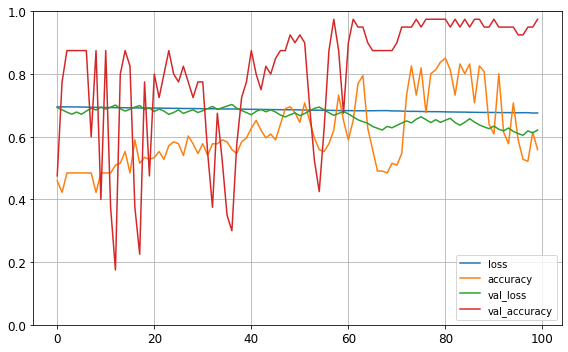

In [221]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [222]:
model.evaluate(X_test_daily, y_test_daily)

2/2 [==============================] - 0s 999us/step - loss: 0.6214 - accuracy: 0.9750


[0.6214388012886047, 0.9750000238418579]

Hourly Dataset

In [223]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train_hourly.shape[1:]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train_hourly, y_train_hourly, epochs=100, validation_data=(X_test_hourly, y_test_hourly))

Epoch 1/100
61/61 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5277 - val_loss: 0.6883 - val_accuracy: 0.5370
Epoch 2/100
61/61 [==============================] - 0s 932us/step - loss: 0.6877 - accuracy: 0.6074 - val_loss: 0.6794 - val_accuracy: 0.7778
Epoch 3/100
61/61 [==============================] - 0s 948us/step - loss: 0.6836 - accuracy: 0.6439 - val_loss: 0.6714 - val_accuracy: 0.7840
Epoch 4/100
61/61 [==============================] - 0s 982us/step - loss: 0.6800 - accuracy: 0.6408 - val_loss: 0.6646 - val_accuracy: 0.8025
Epoch 5/100
61/61 [==============================] - 0s 965us/step - loss: 0.6765 - accuracy: 0.6454 - val_loss: 0.6573 - val_accuracy: 0.7428
Epoch 6/100
61/61 [==============================] - 0s 932us/step - loss: 0.6732 - accuracy: 0.6506 - val_loss: 0.6500 - val_accuracy: 0.7099
Epoch 7/100
61/61 [==============================] - 0s 926us/step - loss: 0.6697 - accuracy: 0.6449 - val_loss: 0.6435 - val_accuracy: 0.7078
E

Epoch 58/100
61/61 [==============================] - 0s 1ms/step - loss: 0.2527 - accuracy: 0.9625 - val_loss: 1.0045 - val_accuracy: 0.7099
Epoch 59/100
61/61 [==============================] - 0s 1ms/step - loss: 0.2466 - accuracy: 0.9702 - val_loss: 1.0667 - val_accuracy: 0.7078
Epoch 60/100
61/61 [==============================] - 0s 1ms/step - loss: 0.2409 - accuracy: 0.9748 - val_loss: 1.1404 - val_accuracy: 0.6975
Epoch 61/100
61/61 [==============================] - 0s 811us/step - loss: 0.2352 - accuracy: 0.9692 - val_loss: 1.1251 - val_accuracy: 0.7078
Epoch 62/100
61/61 [==============================] - 0s 891us/step - loss: 0.2293 - accuracy: 0.9717 - val_loss: 1.1837 - val_accuracy: 0.7016
Epoch 63/100
61/61 [==============================] - 0s 850us/step - loss: 0.2248 - accuracy: 0.9743 - val_loss: 1.2258 - val_accuracy: 0.6975
Epoch 64/100
61/61 [==============================] - 0s 867us/step - loss: 0.2198 - accuracy: 0.9743 - val_loss: 1.2293 - val_accuracy: 0.701

Saving figure keras_learning_curves_plot


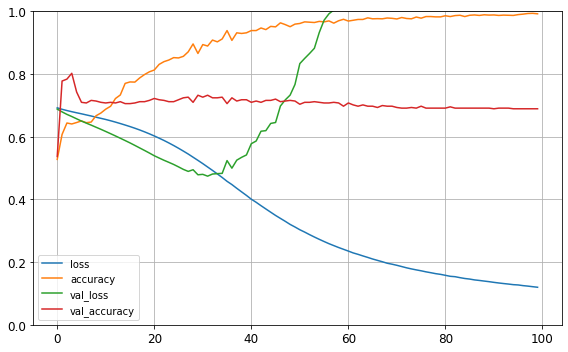

In [224]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [225]:
model.evaluate(X_test_hourly, y_test_hourly)

16/16 [==============================] - 0s 623us/step - loss: 2.4614 - accuracy: 0.6893


[2.4614462852478027, 0.6893004179000854]

Minute Dataset

In [226]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train_minute.shape[1:]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train_minute, y_train_minute, epochs=100, validation_data=(X_test_minute, y_test_minute))

Epoch 1/100
304/304 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5175 - val_loss: 0.6883 - val_accuracy: 0.5681
Epoch 2/100
304/304 [==============================] - 0s 737us/step - loss: 0.6918 - accuracy: 0.5244 - val_loss: 0.6873 - val_accuracy: 0.5685
Epoch 3/100
304/304 [==============================] - 0s 741us/step - loss: 0.6916 - accuracy: 0.5244 - val_loss: 0.6857 - val_accuracy: 0.5681
Epoch 4/100
304/304 [==============================] - 0s 729us/step - loss: 0.6914 - accuracy: 0.5244 - val_loss: 0.6844 - val_accuracy: 0.5681
Epoch 5/100
304/304 [==============================] - 0s 716us/step - loss: 0.6913 - accuracy: 0.5244 - val_loss: 0.6841 - val_accuracy: 0.5685
Epoch 6/100
304/304 [==============================] - 0s 688us/step - loss: 0.6911 - accuracy: 0.5257 - val_loss: 0.6825 - val_accuracy: 0.5681
Epoch 7/100
304/304 [==============================] - 0s 683us/step - loss: 0.6910 - accuracy: 0.5245 - val_loss: 0.6827 - val_accu

Saving figure keras_learning_curves_plot


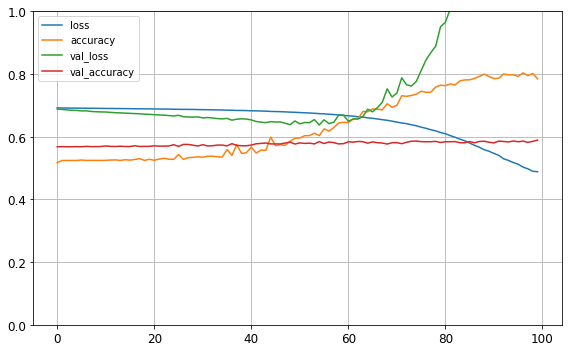

In [227]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [228]:
model.evaluate(X_test_minute, y_test_minute)

76/76 [==============================] - 0s 446us/step - loss: 2.0837 - accuracy: 0.5895


[2.0836904048919678, 0.5894693732261658]